In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleansing / Feature Engineering

In [11]:
# dataset Cleansing
data_df =  pd.read_csv('data_final.csv')


# remove null values
df = data_df.dropna()
# map string values to integers for ease of use
map_stance = {'Orthodox': 0, 'Switch': 1, 'Southpaw': 2, 'Open Stance': 3}
df['B_Stance'] = df['B_Stance'].replace(map_stance)
df['R_Stance'] = df['R_Stance'].replace(map_stance)

map_winner = {'Red': 0, 'Blue': 1, 'Draw': 2}
df['Winner'] = df['Winner'].replace(map_winner)

df.drop(columns=df.select_dtypes(include='bool').columns, inplace=True)

# not enought class labels with draw so we will drop it for our analysis
df = df[df['Winner'] != 2]

# change units 

df['R_Height_ms'] = df['R_Height_cms'] / 100
df['B_Height_ms'] = df['B_Height_cms'] / 100

df['R_Weight_kgs'] = df['R_Weight_lbs'] / 2.205
df['B_Weight_kgs'] = df['B_Weight_lbs'] / 2.205

# calculate new features

df['R_BMI'] = df['R_Weight_kgs'] / (df['R_Height_ms'] ** 2)
df['B_BMI'] = df['B_Weight_kgs'] / (df['B_Height_ms'] ** 2)

df['R_Ape_Index'] = df['R_Reach_cms'] / df['R_Height_cms']
df['B_Ape_Index'] = df['B_Reach_cms'] / df['B_Height_cms']

C:\Users\rafi\AppData\Local\Temp\ipykernel_22424\1806585220.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['B_Stance'] = df['B_Stance'].replace(map_stance)
C:\Users\rafi\AppData\Local\Temp\ipykernel_22424\1806585220.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['B_Stance'] = df['B_Stance'].replace(map_stance)
C:\Users\rafi\AppData\Local\Temp\ipykernel_22424\1806585220.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behav

**Data Cleansing / Feature Engineering**

In [6]:
# for our analysis only want symmetric features
# extract feature names
all_features = df.columns.tolist()
r_features = [f for f in all_features if f.startswith('R_')]
b_features = [f for f in all_features if f.startswith('B_')]

# identify symmetrical features
symmetrical_features = []
non_symmetrical_features = []
for feature in r_features:
    corresponding_feature = feature.replace('R_', 'B_',1)
    if corresponding_feature in b_features:
        symmetrical_features.append(feature)
        symmetrical_features.append(corresponding_feature)
    else:
        non_symmetrical_features.append(feature)

# add the outcome column to the selected features
symmetrical_features.append('Winner')

# filter the dataset to keep only symmetrical features
data_symmetrical = df[symmetrical_features]
data_non_symmetrical = df[non_symmetrical_features]
# display the filtered dataset
print("Symmetrical Features")
print(data_symmetrical.columns)
print("Non-Symmetrical Features")
print(data_non_symmetrical.columns)

Symmetrical Features
Index(['R_avg_KD', 'B_avg_KD', 'R_avg_opp_KD', 'B_avg_opp_KD',
       'R_avg_SIG_STR_pct', 'B_avg_SIG_STR_pct', 'R_avg_opp_SIG_STR_pct',
       'B_avg_opp_SIG_STR_pct', 'R_avg_TD_pct', 'B_avg_TD_pct',
       ...
       'B_age', 'R_Height_ms', 'B_Height_ms', 'R_Weight_kgs', 'B_Weight_kgs',
       'R_BMI', 'B_BMI', 'R_Ape_Index', 'B_Ape_Index', 'Winner'],
      dtype='object', length=145)
Non-Symmetrical Features
Index([], dtype='object')


In [7]:
import random
# set seed for replicability
random.seed(123)

def swap_fighters(row):
  # identify columns related to each fighter
  red_cols = [col for col in row.index if col.startswith('R_')]
  blue_cols = [col for col in row.index if col.startswith('B_')]

  # swap values
  for red_col, blue_col in zip(red_cols, blue_cols):
    row[red_col], row[blue_col] = row[blue_col], row[red_col]

  # swap winner 
  if 'Winner' in row.index:
    row['Winner'] = 1 - row['Winner']  # switch 1 to 0 and vice versa

  return row

# apply swapping function to a random subset of rows
randomised_data = data_symmetrical.apply(lambda row: swap_fighters(row) if random.random() < 0.5 else row, axis=1)

print(randomised_data.head())

   R_avg_KD  B_avg_KD  R_avg_opp_KD  B_avg_opp_KD  R_avg_SIG_STR_pct  \
0  0.255859  0.125000      0.015625       0.00000           0.509478   
1  0.000000  0.234375      0.000000       0.06250           0.660000   
2  0.128906  0.031355      0.500000       0.25296           0.314609   
3  0.125000  0.773438      0.250000       0.06250           0.565625   
4  0.000000  0.003906      0.000000       0.25000           0.690039   

   B_avg_SIG_STR_pct  R_avg_opp_SIG_STR_pct  B_avg_opp_SIG_STR_pct  \
0           0.393750               0.542871               0.456250   
1           0.527969               0.470000               0.450469   
2           0.547223               0.538398               0.440390   
3           0.722578               0.568750               0.546016   
4           0.392988               0.625254               0.425273   

   R_avg_TD_pct  B_avg_TD_pct  ...  B_age  R_Height_ms  B_Height_ms  \
0      0.002114      0.187500  ...   27.0       1.8542       1.8796   
1   

Text(0.5, 1.0, 'Labels Randomised')

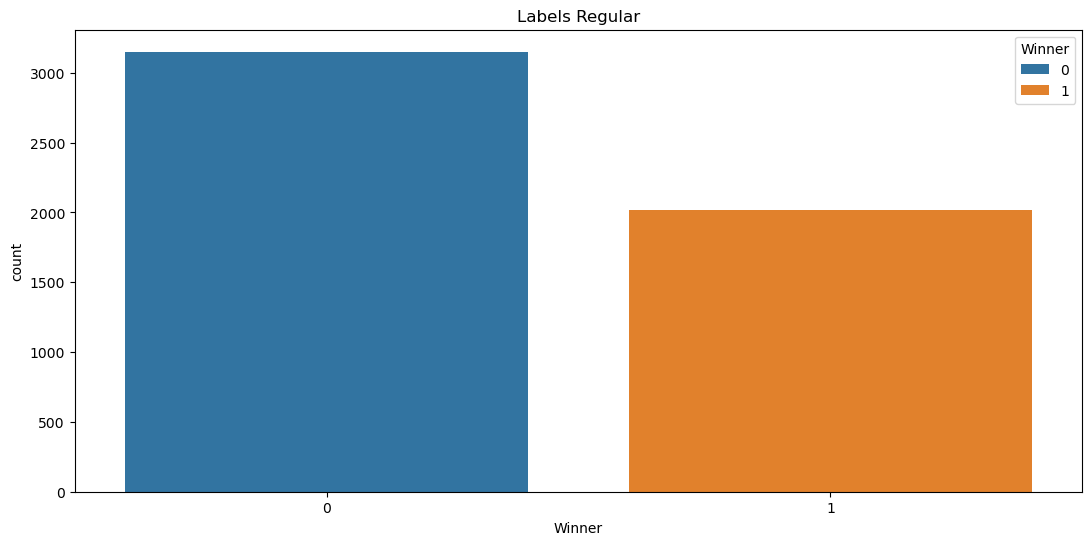

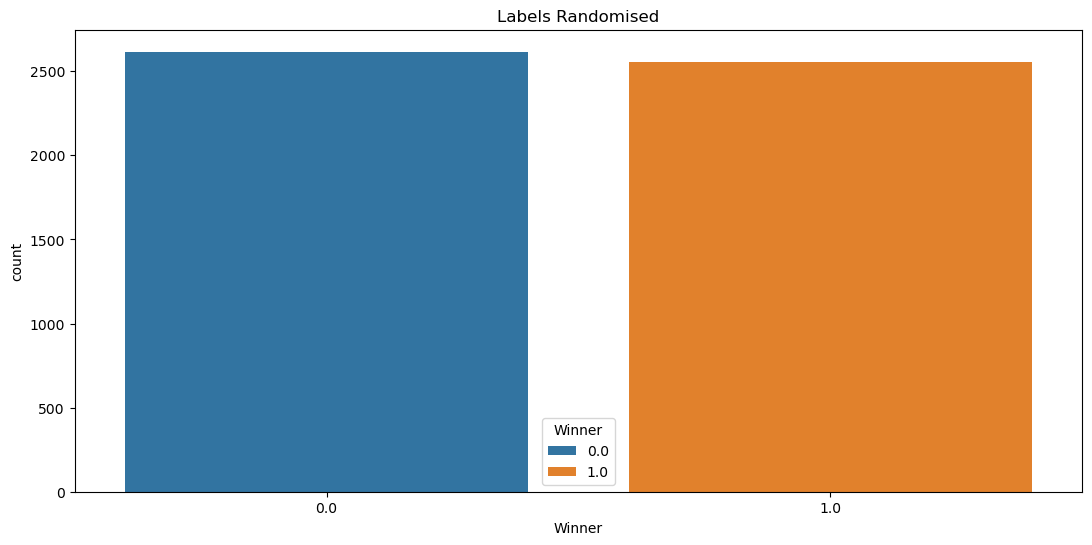

In [8]:
# plot labels pre and post randomistaion
plt.figure(figsize=(13,6))
sns.countplot(x='Winner', data=data_symmetrical, hue='Winner').set_title("Labels Regular")
plt.figure(figsize=(13,6))
sns.countplot(x='Winner', data=randomised_data, hue='Winner').set_title("Labels Randomised")

In [9]:
from sklearn.feature_selection import mutual_info_classif

In [10]:
# try with differenced data (e.g red value - blue value)

difference_features = {}
for col in data_symmetrical.columns:
    if col.startswith('R_'):
        corresponding_col = col.replace('R_', 'B_',1)
        if corresponding_col in data_symmetrical.columns:
            difference_col = col.replace('R_', 'diff_',1)
            difference_features[difference_col] = data_symmetrical[col] - data_symmetrical[corresponding_col]

# create a new df with the differences
diff_data_normal = pd.DataFrame(difference_features)
diff_data_normal['Winner'] = data_symmetrical['Winner']


diff_data_normal.head()

,diff_avg_KD,diff_avg_opp_KD,diff_avg_SIG_STR_pct,diff_avg_opp_SIG_STR_pct,diff_avg_TD_pct,diff_avg_opp_TD_pct,diff_avg_SUB_ATT,diff_avg_opp_SUB_ATT,diff_avg_REV,diff_avg_opp_REV,...,diff_Stance,diff_Height_cms,diff_Reach_cms,diff_Weight_lbs,diff_age,diff_Height_ms,diff_Weight_kgs,diff_BMI,diff_Ape_Index,Winner
0,-0.130859,-0.015625,-0.115728,-0.086621,0.185386,0.172446,0.468750,0.125000,-0.031250,-0.000488,...,0,2.54,2.54,0.0,-7.0,0.0254,0.000000,-0.655094,-0.000185,0
1,0.234375,0.062500,-0.132031,-0.019531,0.265625,-0.345781,0.000000,-1.000000,0.000000,0.000000,...,-1,0.00,-12.70,0.0,-11.0,0.0000,0.000000,0.000000,-0.066667,0
2,-0.097551,-0.247040,0.232614,-0.098008,0.052633,0.158993,0.055423,-0.507812,-0.507808,0.003922,...,0,5.08,0.00,20.0,0.0,0.0508,9.070295,1.200571,-0.027027,1
3,0.648438,-0.187500,0.156953,-0.022734,-0.613750,0.041953,0.250000,-0.187500,-0.500000,-0.250000,...,0,2.54,-2.54,0.0,5.0,0.0254,0.000000,-0.669738,-0.027193,0
4,-0.003906,-0.250000,0.297051,0.199980,-0.475781,-0.001875,1.509766,0.431641,-0.539062,1.125000,...,0,-12.70,-15.24,0.0,0.0,-0.1270,0.000000,2.960355,-0.014085,1


In [11]:
# calculate mutual information for regular dataset
X = diff_data_normal.drop(columns=['Winner'])
y = diff_data_normal['Winner']
mi_regular = mutual_info_classif(X, y,random_state=123)

# create df for visualisation
mi_regular_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_regular})
mi_regular_df = mi_regular_df.sort_values(by='Mutual Information', ascending=False)

mi_regular_df

,Feature,Mutual Information
27,diff_avg_BODY_landed,0.022974
69,diff_Weight_kgs,0.020321
54,diff_wins,0.019589
36,diff_avg_opp_DISTANCE_att,0.017219
67,diff_age,0.017042
...,...,...
45,diff_avg_opp_GROUND_landed,0.000000
43,diff_avg_GROUND_landed,0.000000
42,diff_avg_GROUND_att,0.000000
37,diff_avg_opp_DISTANCE_landed,0.000000


In [12]:
mi_regular_df.to_csv("mi_regular.csv")

In [13]:
# do same differencing for randomised data
difference_features = {}
for col in randomised_data.columns:
    if col.startswith('R_'):
        corresponding_col = col.replace('R_', 'B_',1)
        if corresponding_col in randomised_data.columns:
            difference_col = col.replace('R_', 'diff_',1)
            difference_features[difference_col] = randomised_data[col] - randomised_data[corresponding_col]


diff_data_random = pd.DataFrame(difference_features)
diff_data_random['Winner'] = randomised_data['Winner']


diff_data_random.head()

,diff_avg_KD,diff_avg_opp_KD,diff_avg_SIG_STR_pct,diff_avg_opp_SIG_STR_pct,diff_avg_TD_pct,diff_avg_opp_TD_pct,diff_avg_SUB_ATT,diff_avg_opp_SUB_ATT,diff_avg_REV,diff_avg_opp_REV,...,diff_Stance,diff_Height_cms,diff_Reach_cms,diff_Weight_lbs,diff_age,diff_Height_ms,diff_Weight_kgs,diff_BMI,diff_Ape_Index,Winner
0,0.130859,0.015625,0.115728,0.086621,-0.185386,-0.172446,-0.468750,-0.125000,0.031250,0.000488,...,0.0,-2.54,-2.54,0.0,7.0,-0.0254,0.000000,0.655094,0.000185,1.0
1,-0.234375,-0.062500,0.132031,0.019531,-0.265625,0.345781,0.000000,1.000000,0.000000,0.000000,...,1.0,0.00,12.70,0.0,11.0,0.0000,0.000000,0.000000,0.066667,1.0
2,0.097551,0.247040,-0.232614,0.098008,-0.052633,-0.158993,-0.055423,0.507812,0.507808,-0.003922,...,0.0,-5.08,0.00,-20.0,0.0,-0.0508,-9.070295,-1.200571,0.027027,0.0
3,-0.648438,0.187500,-0.156953,0.022734,0.613750,-0.041953,-0.250000,0.187500,0.500000,0.250000,...,0.0,-2.54,2.54,0.0,-5.0,-0.0254,0.000000,0.669738,0.027193,1.0
4,-0.003906,-0.250000,0.297051,0.199980,-0.475781,-0.001875,1.509766,0.431641,-0.539062,1.125000,...,0.0,-12.70,-15.24,0.0,0.0,-0.1270,0.000000,2.960355,-0.014085,1.0


In [14]:
# calculate mutual information for randomised dataset
X_random = diff_data_random.drop(columns=['Winner'])
y_random = diff_data_random['Winner']
mi_random = mutual_info_classif(X_random, y_random,random_state=123)

# create df for visualisation
mi_random_df = pd.DataFrame({'Feature': X_random.columns, 'Mutual Information': mi_random})
mi_random_df = mi_random_df.sort_values(by='Mutual Information', ascending=False)

mi_random_df

,Feature,Mutual Information
1,diff_avg_opp_KD,0.024400
47,diff_avg_opp_CTRL_time(seconds),0.019284
55,diff_losses,0.018425
67,diff_age,0.015975
61,diff_win_by_Submission,0.015551
...,...,...
45,diff_avg_opp_GROUND_landed,0.000000
20,diff_avg_opp_TD_att,0.000000
24,diff_avg_opp_HEAD_att,0.000000
26,diff_avg_BODY_att,0.000000


In [15]:
mi_random_df.to_csv("mi_random.csv")

In [16]:
# set a threshold for removing features
threshold = 0.000000

# filter features based on threshold
features_with_mutual_info_regular = mi_regular_df[mi_regular_df['Mutual Information'] > threshold]['Feature']
features_without_mutual_info_regular = mi_regular_df[mi_regular_df['Mutual Information'] <= threshold]['Feature']

print("Features with info - Regular")
print(len(features_with_mutual_info_regular))

print("Features without info - Regular")
print(len(features_without_mutual_info_regular))

Features with info - Regular
45
Features without info - Regular
27


In [17]:
# do same for random dataset
features_with_mutual_info_random = mi_random_df[mi_random_df['Mutual Information'] > threshold]['Feature']
features_without_mutual_info_random = mi_random_df[mi_random_df['Mutual Information'] <= threshold]['Feature']

print("Features with info - Random")
print(len(features_with_mutual_info_random))

print("Features without info - Random")
print(len(features_without_mutual_info_random))

Features with info - Random
48
Features without info - Random
24


In [18]:
# see what features are exclusive to each set

features_only_reg = np.setdiff1d(features_with_mutual_info_regular, features_with_mutual_info_random)
features_only_random = np.setdiff1d(features_with_mutual_info_random, features_with_mutual_info_regular)

print(features_only_reg)
print(features_only_random)

['diff_Weight_kgs' 'diff_Weight_lbs' 'diff_avg_LEG_att' 'diff_avg_REV'
 'diff_avg_SIG_STR_pct' 'diff_avg_SUB_ATT' 'diff_avg_TD_landed'
 'diff_avg_TD_pct' 'diff_avg_opp_BODY_landed' 'diff_avg_opp_HEAD_att'
 'diff_avg_opp_SIG_STR_pct' 'diff_avg_opp_TD_att'
 'diff_total_rounds_fought']
['diff_Ape_Index' 'diff_Height_cms' 'diff_avg_CLINCH_att'
 'diff_avg_CLINCH_landed' 'diff_avg_GROUND_att' 'diff_avg_GROUND_landed'
 'diff_avg_TOTAL_STR_att' 'diff_avg_opp_HEAD_landed'
 'diff_avg_opp_LEG_att' 'diff_avg_opp_TD_landed' 'diff_avg_opp_TD_pct'
 'diff_current_lose_streak' 'diff_draw' 'diff_longest_win_streak'
 'diff_total_time_fought(seconds)' 'diff_total_title_bouts']


In [19]:
# final features after feature selection

final_features_normal = diff_data_normal[features_with_mutual_info_regular.tolist() + ['Winner']]
final_features_random = diff_data_random[features_with_mutual_info_random.tolist() + ['Winner']]

# Train / Calibration / Test Splits

In [21]:
from sklearn.model_selection import train_test_split
# regular (no randomisation) - reduced feature set
X_reg_red = final_features_normal.drop(columns=['Winner'])
y_reg_red = final_features_normal['Winner']
X_train_reg_red, X_test_reg_red, y_train_reg_red, y_test_reg_red = train_test_split(X_reg_red, y_reg_red, test_size=0.2,random_state=123)
X_prop_train_reg_red, X_cal_reg_red, y_prop_train_reg_red, y_cal_reg_red = train_test_split(X_train_reg_red, y_train_reg_red, test_size=0.25,random_state=123)
print("Training size = " + str(X_prop_train_reg_red.shape[0]))
print("Testing size = " + str(X_test_reg_red.shape[0]))
print("Calibration size = " + str(X_cal_reg_red.shape[0]))

Training size = 3101
Testing size = 1034
Calibration size = 1034


In [22]:
from sklearn.preprocessing import StandardScaler
# regular (no randomisation) - reduced feature set - scaled
scaler = StandardScaler()
X_prop_train_scaled_reg_red = scaler.fit_transform(X_prop_train_reg_red)
X_test_scaled_reg_red = scaler.transform(X_test_reg_red)
X_cal_scaled_reg_red = scaler.transform(X_cal_reg_red)

print("Training size = " + str(X_prop_train_scaled_reg_red.shape[0]))
print("Testing size = " + str(X_test_scaled_reg_red.shape[0]))
print("Calibration size = " + str(X_cal_scaled_reg_red.shape[0]))

Training size = 3101
Testing size = 1034
Calibration size = 1034


In [23]:
# randomisation - reduced feature set
X_rand_red = final_features_random.drop(columns=['Winner'])
y_rand_red = final_features_random['Winner']
X_train_rand_red, X_test_rand_red, y_train_rand_red, y_test_rand_red = train_test_split(X_rand_red, y_rand_red, test_size=0.2,random_state=123)
X_prop_train_rand_red, X_cal_rand_red, y_prop_train_rand_red, y_cal_rand_red = train_test_split(X_train_rand_red, y_train_rand_red, test_size=0.25,random_state=123)
print("Training size = " + str(X_prop_train_rand_red.shape[0]))
print("Testing size = " + str(X_test_rand_red.shape[0]))
print("Calibration size = " + str(X_cal_rand_red.shape[0]))



Training size = 3101
Testing size = 1034
Calibration size = 1034


In [24]:
#  randomisation - reduced feature set - scaled
scaler = StandardScaler()
X_prop_train_scaled_rand_red = scaler.fit_transform(X_prop_train_rand_red)
X_test_scaled_rand_red = scaler.transform(X_test_rand_red)
X_cal_scaled_rand_red = scaler.transform(X_cal_rand_red)

print("Training size = " + str(X_prop_train_scaled_rand_red.shape[0]))
print("Testing size = " + str(X_test_scaled_rand_red.shape[0]))
print("Calibration size = " + str(X_cal_scaled_rand_red.shape[0]))

Training size = 3101
Testing size = 1034
Calibration size = 1034


In [25]:
# regular (no randomisation) - full feature set
X_reg_full = diff_data_normal.drop(columns=['Winner'])
y_reg_full = diff_data_normal['Winner']

X_train_reg_full, X_test_reg_full, y_train_reg_full, y_test_reg_full = train_test_split(X_reg_full, y_reg_full, test_size=0.2,random_state=123)
X_prop_train_reg_full, X_cal_reg_full, y_prop_train_reg_full, y_cal_reg_full = train_test_split(X_train_reg_full, y_train_reg_full, test_size=0.25,random_state=123)
print("Training size = " + str(X_prop_train_reg_full.shape[0]))
print("Testing size = " + str(X_test_reg_full.shape[0]))
print("Calibration size = " + str(X_cal_reg_full.shape[0]))

Training size = 3101
Testing size = 1034
Calibration size = 1034


In [26]:
# regular (no randomisation) - full feature set - scaled
scaler = StandardScaler()
X_prop_train_scaled_reg_full = scaler.fit_transform(X_prop_train_reg_full)
X_test_scaled_reg_full = scaler.transform(X_test_reg_full)
X_cal_scaled_reg_full = scaler.transform(X_cal_reg_full)

print("Training size = " + str(X_prop_train_scaled_reg_full.shape[0]))
print("Testing size = " + str(X_test_scaled_reg_full.shape[0]))
print("Calibration size = " + str(X_cal_scaled_reg_full.shape[0]))

Training size = 3101
Testing size = 1034
Calibration size = 1034


In [27]:
# randomisation - full feature set
X_rand_full = diff_data_random.drop(columns=['Winner'])
y_rand_full = diff_data_random['Winner']

X_train_rand_full, X_test_rand_full, y_train_rand_full, y_test_rand_full = train_test_split(X_rand_full, y_rand_full, test_size=0.2,random_state=123)
X_prop_train_rand_full, X_cal_rand_full, y_prop_train_rand_full, y_cal_rand_full = train_test_split(X_train_rand_full, y_train_rand_full, test_size=0.25,random_state=123)
print("Training size = " + str(X_prop_train_rand_full.shape[0]))
print("Testing size = " + str(X_test_rand_full.shape[0]))
print("Calibration size = " + str(X_cal_rand_full.shape[0]))

Training size = 3101
Testing size = 1034
Calibration size = 1034


In [28]:
# randomisation - full feature set - scaled
scaler = StandardScaler()
X_prop_train_scaled_rand_full = scaler.fit_transform(X_prop_train_rand_full)
X_test_scaled_rand_full = scaler.transform(X_test_rand_full)
X_cal_scaled_rand_full = scaler.transform(X_cal_rand_full)

print("Training size = " + str(X_prop_train_scaled_rand_full.shape[0]))
print("Testing size = " + str(X_test_scaled_rand_full.shape[0]))
print("Calibration size = " + str(X_cal_scaled_rand_full.shape[0]))

Training size = 3101
Testing size = 1034
Calibration size = 1034


In [29]:
# SMOTE - reduced feature set
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_reg_red_sm, y_train_reg_red_sm = sm.fit_resample(X_prop_train_reg_red, y_prop_train_reg_red)
print("Training size (oversampling) = " + str(X_train_reg_red_sm.shape[0]))

Training size (oversampling) = 3750


In [30]:
# SMOTE - reduced feature set -scaled
X_train_scaled_reg_red_sm, y_train_scaled_reg_red_sm = sm.fit_resample(X_prop_train_scaled_reg_red, y_prop_train_reg_red)
print("Training size (oversampling) = " + str(X_train_scaled_reg_red_sm.shape[0]))

Training size (oversampling) = 3750


In [31]:
# SMOTE - reduced feature set
X_train_reg_full_sm, y_train_reg_full_sm = sm.fit_resample(X_prop_train_reg_full, y_prop_train_reg_full)
print("Training size (oversampling) = " + str(X_train_reg_full_sm.shape[0]))

Training size (oversampling) = 3750


In [32]:
# SMOTE - reduced feature set - scaled
X_train_scaled_reg_full_sm, y_train_scaled_reg_full_sm = sm.fit_resample(X_prop_train_scaled_reg_full, y_prop_train_reg_full)
print("Training size (oversampling) = " + str(X_train_scaled_reg_full_sm.shape[0]))

Training size (oversampling) = 3750


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [34]:
# used to calculate sensitivity and specificity of our models 
def calculate_class_accuracies(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    TN, FP, FN, TP = cm.ravel()

    accuracy_red = TN / (TN + FP) if (TN + FP) != 0 else 0
    accuracy_blue = TP / (TP + FN) if (TP + FN) != 0 else 0

    return [accuracy_red, accuracy_blue]


# XGB

In [ ]:
# !pip install scikit-optimize

In [36]:
import xgboost
from xgboost import XGBClassifier

Overall Accuracy: 0.5986460348162476
Red Accuracy: 0.72782874617737
Blue Accuracy: 0.3763157894736842
Balanced Accuracy: 0.5520722678255271


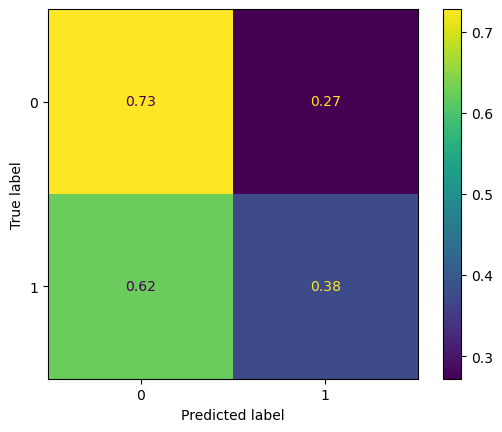

In [37]:
# XGB - DEFAULT - NO RANDOMISATION - REDUCED FEATURE SET
xgb_reg_red = XGBClassifier(objective='binary:logistic',random_state =1)
xgb_reg_red.fit(X_prop_train_reg_red, y_prop_train_reg_red)
y_pred_xgb_reg_red = xgb_reg_red.predict(X_test_reg_red)
accuracy_xgb_reg_red = accuracy_score(y_test_reg_red, y_pred_xgb_reg_red)
red_accuracy_xgb_reg_red = calculate_class_accuracies(y_test_reg_red, y_pred_xgb_reg_red)[0]
blue_accuracy_xgb_reg_red = calculate_class_accuracies(y_test_reg_red, y_pred_xgb_reg_red)[1]
bal_accuracy_xgb_reg_red = balanced_accuracy_score(y_test_reg_red, y_pred_xgb_reg_red)

print("Overall Accuracy:", accuracy_xgb_reg_red)
print("Red Accuracy:", red_accuracy_xgb_reg_red)
print("Blue Accuracy:", blue_accuracy_xgb_reg_red)
print("Balanced Accuracy:", bal_accuracy_xgb_reg_red)

ConfusionMatrixDisplay.from_estimator(xgb_reg_red, X_test_reg_red, y_test_reg_red, normalize="true")

Overall Accuracy: 0.5899419729206963
Red Accuracy: 0.7110091743119266
Blue Accuracy: 0.3815789473684211
Balanced Accuracy: 0.5462940608401738


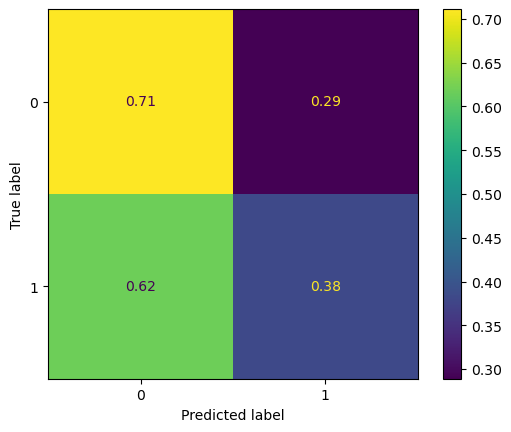

In [38]:
# XGB - DEFAULT - NO RANDOMISATION - FULL FEATURE SET
xgb_reg_full = XGBClassifier(objective='binary:logistic', random_state=1)
xgb_reg_full.fit(X_prop_train_reg_full, y_prop_train_reg_full)
y_pred_xgb_reg_full = xgb_reg_full.predict(X_test_reg_full)

# Calculate Accuracy Metrics (matching the previous example)
accuracy_xgb_reg_full = accuracy_score(y_test_reg_full, y_pred_xgb_reg_full)
red_accuracy_xgb_reg_full, blue_accuracy_xgb_reg_full = calculate_class_accuracies(y_test_reg_full, y_pred_xgb_reg_full)
bal_accuracy_xgb_reg_full = balanced_accuracy_score(y_test_reg_full, y_pred_xgb_reg_full)

# Print Accuracy Metrics
print("Overall Accuracy:", accuracy_xgb_reg_full)
print("Red Accuracy:", red_accuracy_xgb_reg_full)
print("Blue Accuracy:", blue_accuracy_xgb_reg_full)
print("Balanced Accuracy:", bal_accuracy_xgb_reg_full)

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_reg_full, X_test_reg_full, y_test_reg_full, normalize="true")

Overall Accuracy: 0.558027079303675
Red Accuracy: 0.5996275605214153
Blue Accuracy: 0.5130784708249497
Balanced Accuracy: 0.5563530156731825


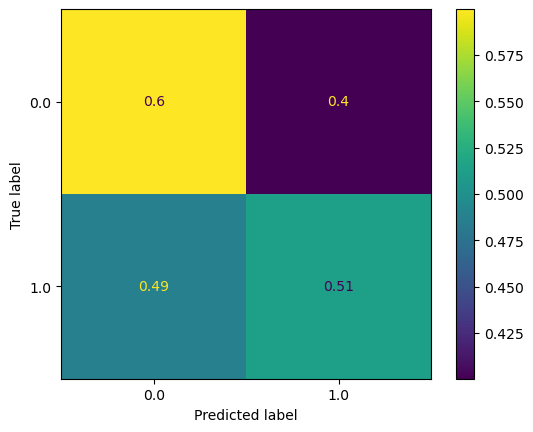

In [39]:
# XGB - DEFAULT - RANDOMISATION - REDUCED FEATURE SET
xgb_rand_red = XGBClassifier(objective='binary:logistic', random_state=1)
xgb_rand_red.fit(X_prop_train_rand_red, y_prop_train_rand_red)
y_pred_xgb_rand_red = xgb_rand_red.predict(X_test_rand_red)

# Calculate Accuracy Metrics (matching the desired format)
accuracy_xgb_rand_red = accuracy_score(y_test_rand_red, y_pred_xgb_rand_red)
red_accuracy_xgb_rand_red, blue_accuracy_xgb_rand_red = calculate_class_accuracies(y_test_rand_red, y_pred_xgb_rand_red)
bal_accuracy_xgb_rand_red = balanced_accuracy_score(y_test_rand_red, y_pred_xgb_rand_red)

# Print Accuracy Metrics
print("Overall Accuracy:", accuracy_xgb_rand_red)
print("Red Accuracy:", red_accuracy_xgb_rand_red)
print("Blue Accuracy:", blue_accuracy_xgb_rand_red)
print("Balanced Accuracy:", bal_accuracy_xgb_rand_red)

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_rand_red, X_test_rand_red, y_test_rand_red, normalize="true")

Overall Accuracy: 0.5638297872340425
Red Accuracy: 0.5921787709497207
Blue Accuracy: 0.5331991951710262
Balanced Accuracy: 0.5626889830603734


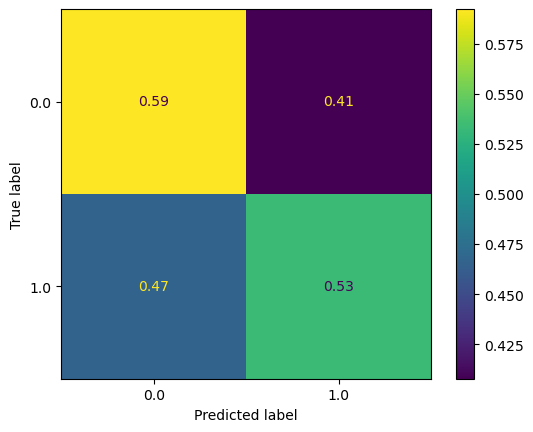

In [40]:
# XGB - DEFAULT - RANDOMISATION - FULL FEATURE SET
xgb_rand_full = XGBClassifier(objective='binary:logistic', random_state=1)
xgb_rand_full.fit(X_prop_train_rand_full, y_prop_train_rand_full)
y_pred_xgb_rand_full = xgb_rand_full.predict(X_test_rand_full)

# Calculate Accuracy Metrics (matching the desired format)
accuracy_xgb_rand_full = accuracy_score(y_test_rand_full, y_pred_xgb_rand_full)
red_accuracy_xgb_rand_full, blue_accuracy_xgb_rand_full = calculate_class_accuracies(y_test_rand_full, y_pred_xgb_rand_full)
bal_accuracy_xgb_rand_full = balanced_accuracy_score(y_test_rand_full, y_pred_xgb_rand_full)

# Print Accuracy Metrics
print("Overall Accuracy:", accuracy_xgb_rand_full)
print("Red Accuracy:", red_accuracy_xgb_rand_full)
print("Blue Accuracy:", blue_accuracy_xgb_rand_full)
print("Balanced Accuracy:", bal_accuracy_xgb_rand_full)

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_rand_full, X_test_rand_full, y_test_rand_full, normalize="true")

Overall Accuracy: 0.5705996131528046
Red Accuracy: 0.6590214067278287
Blue Accuracy: 0.41842105263157897
Balanced Accuracy: 0.5387212296797038


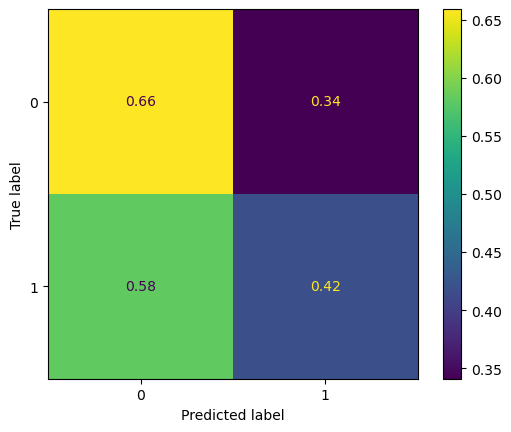

In [41]:
# XGB - DEFAULT - SMOTE - REDUCED FEATURE SET
xgb_sm_red = XGBClassifier(objective='binary:logistic', random_state=1)
xgb_sm_red.fit(X_train_reg_red_sm, y_train_reg_red_sm)
y_pred_xgb_sm_red = xgb_sm_red.predict(X_test_reg_red)

# Calculate Accuracy Metrics (matching the desired format)
accuracy_xgb_sm_red = accuracy_score(y_test_reg_red, y_pred_xgb_sm_red)
red_accuracy_xgb_sm_red, blue_accuracy_xgb_sm_red = calculate_class_accuracies(y_test_reg_red, y_pred_xgb_sm_red)
bal_accuracy_xgb_sm_red = balanced_accuracy_score(y_test_reg_red, y_pred_xgb_sm_red)

# Print Accuracy Metrics
print("Overall Accuracy:", accuracy_xgb_sm_red)
print("Red Accuracy:", red_accuracy_xgb_sm_red)
print("Blue Accuracy:", blue_accuracy_xgb_sm_red)
print("Balanced Accuracy:", bal_accuracy_xgb_sm_red)

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_sm_red, X_test_reg_red, y_test_reg_red, normalize="true")

Overall Accuracy: 0.5986460348162476
Red Accuracy: 0.6788990825688074
Blue Accuracy: 0.4605263157894737
Balanced Accuracy: 0.5697126991791406


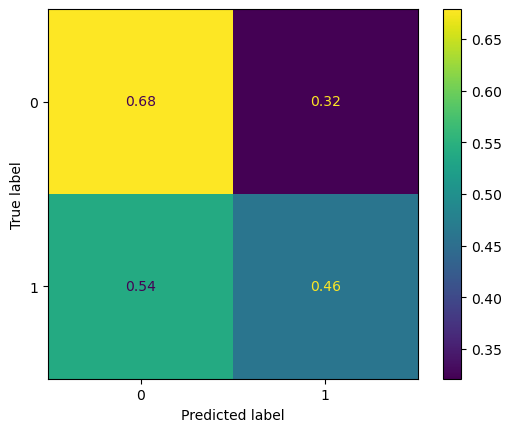

In [42]:
# XGB - DEFAULT - SMOTE - FULL FEATURE SET
xgb_sm_full = XGBClassifier(objective='binary:logistic', random_state=1)
xgb_sm_full.fit(X_train_reg_full_sm, y_train_reg_full_sm)
y_pred_xgb_sm_full = xgb_sm_full.predict(X_test_reg_full)

# Calculate Accuracy Metrics (matching the desired format)
accuracy_xgb_sm_full = accuracy_score(y_test_reg_full, y_pred_xgb_sm_full)
red_accuracy_xgb_sm_full, blue_accuracy_xgb_sm_full = calculate_class_accuracies(y_test_reg_full, y_pred_xgb_sm_full)
bal_accuracy_xgb_sm_full = balanced_accuracy_score(y_test_reg_full, y_pred_xgb_sm_full)

# Print Accuracy Metrics
print("Overall Accuracy:", accuracy_xgb_sm_full)
print("Red Accuracy:", red_accuracy_xgb_sm_full)
print("Blue Accuracy:", blue_accuracy_xgb_sm_full)
print("Balanced Accuracy:", bal_accuracy_xgb_sm_full)

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_sm_full, X_test_reg_full, y_test_reg_full, normalize="true")

# XGB Optimised 

In [44]:
# create search space for bayes optimsation
param_space_xgb = {
    'n_estimators': Integer(50, 200),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'subsample': Real(0.7, 1.0, 'uniform'),
    'colsample_bytree': Real(0.7, 1.0, 'uniform'),
    'gamma': Real(0, 5, 'uniform'),
    'min_child_weight': Integer(1, 6),
    'reg_alpha': Real(0.0, 1.0, 'uniform'),
    'reg_lambda': Real(0.0, 1.0, 'uniform')
}

In [45]:
# initiate optimiser with default model 

xgb_model = XGBClassifier(objective='binary:logistic',random_state =1)
bayes_search_xgb = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=param_space_xgb,
    scoring='neg_log_loss',  # changed scoring metric as imbalanced classification
    n_iter=100,
    cv=5,
    n_jobs=-1,
    verbose=0
)

OrderedDict({'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.030423599726942804, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 200, 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'subsample': 0.7})
Overall Accuracy: 0.6160541586073501
Red Accuracy: 0.7996941896024465
Blue Accuracy: 0.3
Balanced Accuracy: 0.5498470948012233


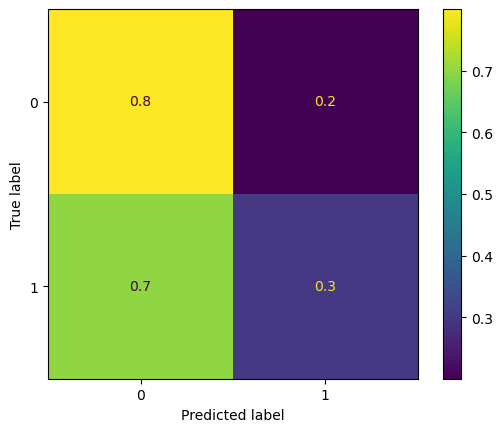

In [46]:
# XGB - BEST PARAMS - NO RANDOMISATION - REDUCED FEATURE SET
# run optimiser and fit params

# bayes_search_xgb.fit(X_prop_train_reg_red, y_prop_train_reg_red)
# best_params_xgb_reg_red = bayes_search_xgb.best_params_
# print(best_params_xgb_reg_red)

best_params_xgb_reg_red = {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.030423599726942804, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 200, 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'subsample': 0.7}
xgb_reg_red_opt = XGBClassifier(objective='binary:logistic',random_state =1)
xgb_reg_red_opt.set_params(**best_params_xgb_reg_red)
xgb_reg_red_opt.fit(X_prop_train_reg_red, y_prop_train_reg_red)

# make predictions using the optimised model
y_pred_xgb_reg_red_opt = xgb_reg_red_opt.predict(X_test_reg_red)

# calculate accuracy metrics
accuracy_xgb_reg_red_opt = accuracy_score(y_test_reg_red, y_pred_xgb_reg_red_opt)
red_accuracy_xgb_reg_red_opt, blue_accuracy_xgb_reg_red_opt = calculate_class_accuracies(y_test_reg_red, y_pred_xgb_reg_red_opt)
bal_accuracy_xgb_reg_red_opt = balanced_accuracy_score(y_test_reg_red, y_pred_xgb_reg_red_opt)

# print accuracy metrics
print("Overall Accuracy:", accuracy_xgb_reg_red_opt)
print("Red Accuracy:", red_accuracy_xgb_reg_red_opt)
print("Blue Accuracy:", blue_accuracy_xgb_reg_red_opt)
print("Balanced Accuracy:", bal_accuracy_xgb_reg_red_opt)

# display confusion matrix
ConfusionMatrixDisplay.from_estimator(xgb_reg_red_opt, X_test_reg_red, y_test_reg_red, normalize="true")

OrderedDict({'colsample_bytree': 0.7, 'gamma': 1.7825956568864338, 'learning_rate': 0.02298430886265549, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0.4743751399822215, 'reg_lambda': 0.0, 'subsample': 0.7})
Overall Accuracy: 0.6150870406189555
Red Accuracy: 0.8149847094801224
Blue Accuracy: 0.2710526315789474
Balanced Accuracy: 0.5430186705295349


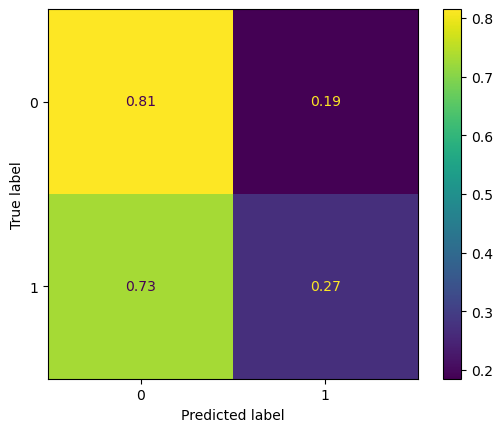

In [47]:
# XGB - BEST PARAMS - NO RANDOMISATION - FULL FEATURE SET

# bayes_search_xgb.fit(X_prop_train_reg_full, y_prop_train_reg_full)
# best_params_xgb_reg_full = bayes_search_xgb.best_params_
# print(best_params_xgb_reg_full)

best_params_xgb_reg_full = {'colsample_bytree': 0.7, 'gamma': 1.7825956568864338, 'learning_rate': 0.02298430886265549, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0.4743751399822215, 'reg_lambda': 0.0, 'subsample': 0.7}


xgb_reg_full_opt = XGBClassifier(objective='binary:logistic',random_state =1)
xgb_reg_full_opt.set_params(**best_params_xgb_reg_full)
xgb_reg_full_opt.fit(X_prop_train_reg_full, y_prop_train_reg_full)

# make predictions using the optimised model
y_pred_xgb_reg_full_opt = xgb_reg_full_opt.predict(X_test_reg_full)

# calculate accuracy metrics
accuracy_xgb_reg_full_opt = accuracy_score(y_test_reg_full, y_pred_xgb_reg_full_opt)
red_accuracy_xgb_reg_full_opt, blue_accuracy_xgb_reg_full_opt = calculate_class_accuracies(y_test_reg_full, y_pred_xgb_reg_full_opt)
bal_accuracy_xgb_reg_full_opt = balanced_accuracy_score(y_test_reg_full, y_pred_xgb_reg_full_opt)

# print accuracy metrics
print("Overall Accuracy:", accuracy_xgb_reg_full_opt)
print("Red Accuracy:", red_accuracy_xgb_reg_full_opt)
print("Blue Accuracy:", blue_accuracy_xgb_reg_full_opt)
print("Balanced Accuracy:", bal_accuracy_xgb_reg_full_opt)

# display confusion matrix
ConfusionMatrixDisplay.from_estimator(xgb_reg_full_opt, X_test_reg_full, y_test_reg_full, normalize="true")

OrderedDict({'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.020220321192396484, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 184, 'reg_alpha': 0.3054288134566825, 'reg_lambda': 0.0, 'subsample': 0.7})
Overall Accuracy: 0.5531914893617021
Red Accuracy: 0.5977653631284916
Blue Accuracy: 0.5050301810865191
Balanced Accuracy: 0.5513977721075054


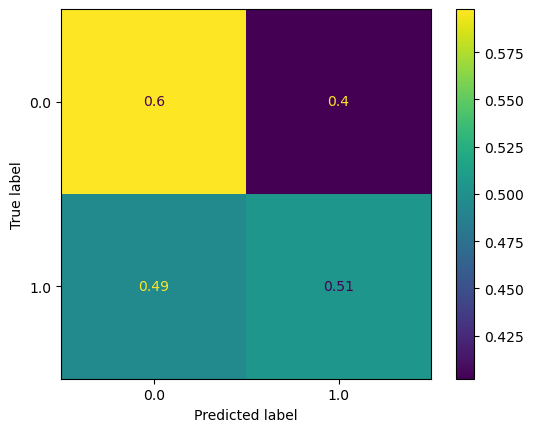

In [48]:
# XGB - BEST PARAMS - RANDOMISATION - REDUCED FEATURE SET
# bayes_search_xgb.fit(X_prop_train_rand_red, y_prop_train_rand_red)
# best_params_xgb_rand_red = bayes_search_xgb.best_params_
# print(best_params_xgb_rand_red)

best_params_xgb_rand_red = {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.020220321192396484, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 184, 'reg_alpha': 0.3054288134566825, 'reg_lambda': 0.0, 'subsample': 0.7}

xgb_rand_red_opt = XGBClassifier(objective='binary:logistic',random_state =1)
xgb_rand_red_opt.set_params(**best_params_xgb_rand_red)
xgb_rand_red_opt.fit(X_prop_train_rand_red, y_prop_train_rand_red)



y_pred_xgb_rand_red_opt = xgb_rand_red_opt.predict(X_test_rand_red)


accuracy_xgb_rand_red_opt = accuracy_score(y_test_rand_red, y_pred_xgb_rand_red_opt)
red_accuracy_xgb_rand_red_opt, blue_accuracy_xgb_rand_red_opt = calculate_class_accuracies(y_test_rand_red, y_pred_xgb_rand_red_opt)
bal_accuracy_xgb_rand_red_opt = balanced_accuracy_score(y_test_rand_red, y_pred_xgb_rand_red_opt)


print("Overall Accuracy:", accuracy_xgb_rand_red_opt)
print("Red Accuracy:", red_accuracy_xgb_rand_red_opt)
print("Blue Accuracy:", blue_accuracy_xgb_rand_red_opt)
print("Balanced Accuracy:", bal_accuracy_xgb_rand_red_opt)


ConfusionMatrixDisplay.from_estimator(xgb_rand_red_opt, X_test_rand_red, y_test_rand_red, normalize="true")

OrderedDict({'colsample_bytree': 1.0, 'gamma': 5.0, 'learning_rate': 0.031269098881856895, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 200, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample': 0.7719609575439323})
Overall Accuracy: 0.5647969052224371
Red Accuracy: 0.5810055865921788
Blue Accuracy: 0.5472837022132797
Balanced Accuracy: 0.5641446444027293


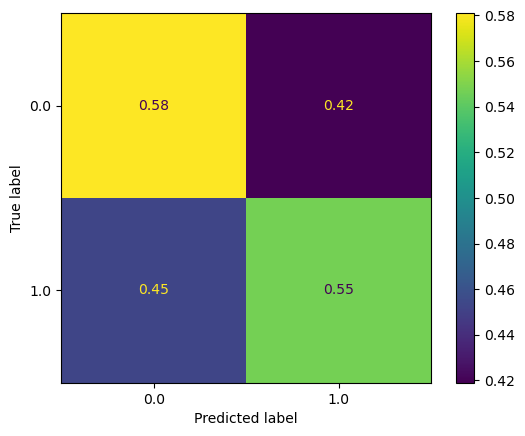

In [49]:
# XGB - BEST PARAMS - RANDOMISATION - FULL FEATURE SET
# bayes_search_xgb.fit(X_prop_train_rand_full, y_prop_train_rand_full)
# best_params_xgb_rand_full = bayes_search_xgb.best_params_
# print(best_params_xgb_rand_full)

best_params_xgb_rand_full = {'colsample_bytree': 1.0, 'gamma': 5.0, 'learning_rate': 0.031269098881856895, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 200, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample': 0.7719609575439323}


xgb_rand_full_opt = XGBClassifier(objective='binary:logistic',random_state =1)
xgb_rand_full_opt.set_params(**best_params_xgb_rand_full)
xgb_rand_full_opt.fit(X_prop_train_rand_full, y_prop_train_rand_full)

#
y_pred_xgb_rand_full_opt = xgb_rand_full_opt.predict(X_test_rand_full)

# 
accuracy_xgb_rand_full_opt = accuracy_score(y_test_rand_full, y_pred_xgb_rand_full_opt)
red_accuracy_xgb_rand_full_opt, blue_accuracy_xgb_rand_full_opt = calculate_class_accuracies(y_test_rand_full, y_pred_xgb_rand_full_opt)
bal_accuracy_xgb_rand_full_opt = balanced_accuracy_score(y_test_rand_full, y_pred_xgb_rand_full_opt)

# 
print("Overall Accuracy:", accuracy_xgb_rand_full_opt)
print("Red Accuracy:", red_accuracy_xgb_rand_full_opt)
print("Blue Accuracy:", blue_accuracy_xgb_rand_full_opt)
print("Balanced Accuracy:", bal_accuracy_xgb_rand_full_opt)

# 
ConfusionMatrixDisplay.from_estimator(xgb_rand_full_opt, X_test_rand_full, y_test_rand_full, normalize="true")

Overall Accuracy: 0.5841392649903289
Red Accuracy: 0.636085626911315
Blue Accuracy: 0.49473684210526314
Balanced Accuracy: 0.5654112345082891


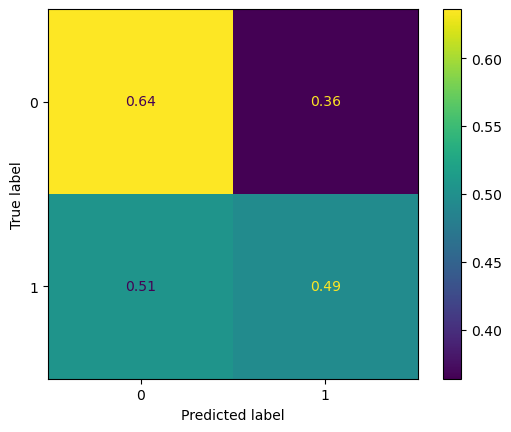

In [50]:
# XGB - BEST PARAMS - SMOTE - REDUCED FEATURE SET

xgb_sm_red_opt = XGBClassifier(objective='binary:logistic', random_state=1)
xgb_sm_red_opt.set_params(**best_params_xgb_reg_red)
xgb_sm_red_opt.fit(X_train_reg_red_sm, y_train_reg_red_sm)

y_pred_xgb_sm_red_opt = xgb_sm_red_opt.predict(X_test_reg_red)

# 
accuracy_xgb_sm_red_opt = accuracy_score(y_test_reg_red, y_pred_xgb_sm_red_opt)
red_accuracy_xgb_sm_red_opt, blue_accuracy_xgb_sm_red_opt = calculate_class_accuracies(y_test_reg_red, y_pred_xgb_sm_red_opt)
bal_accuracy_xgb_sm_red_opt = balanced_accuracy_score(y_test_reg_red, y_pred_xgb_sm_red_opt)

# 
print("Overall Accuracy:", accuracy_xgb_sm_red_opt)
print("Red Accuracy:", red_accuracy_xgb_sm_red_opt)
print("Blue Accuracy:", blue_accuracy_xgb_sm_red_opt)
print("Balanced Accuracy:", bal_accuracy_xgb_sm_red_opt)

# 
ConfusionMatrixDisplay.from_estimator(xgb_sm_red_opt, X_test_reg_red, y_test_reg_red, normalize="true")

Overall Accuracy: 0.6034816247582205
Red Accuracy: 0.6467889908256881
Blue Accuracy: 0.5289473684210526
Balanced Accuracy: 0.5878681796233703


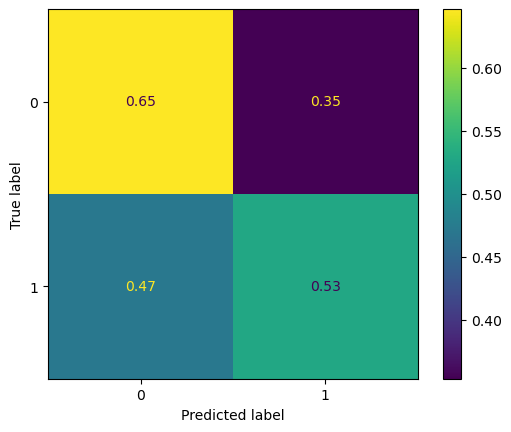

In [51]:
# XGB - BEST PARAMS - SMOTE - FULL FEATURE SET
xgb_sm_full_opt = XGBClassifier(objective='binary:logistic',random_state =1)
xgb_sm_full_opt.set_params(**best_params_xgb_reg_full)
xgb_sm_full_opt.fit(X_train_reg_full_sm, y_train_reg_full_sm)

y_pred_xgb_sm_full_opt = xgb_sm_full_opt.predict(X_test_reg_full)


accuracy_xgb_sm_full_opt = accuracy_score(y_test_reg_full, y_pred_xgb_sm_full_opt)
red_accuracy_xgb_sm_full_opt, blue_accuracy_xgb_sm_full_opt = calculate_class_accuracies(y_test_reg_full, y_pred_xgb_sm_full_opt)
bal_accuracy_xgb_sm_full_opt = balanced_accuracy_score(y_test_reg_full, y_pred_xgb_sm_full_opt)

# 
print("Overall Accuracy:", accuracy_xgb_sm_full_opt)
print("Red Accuracy:", red_accuracy_xgb_sm_full_opt)
print("Blue Accuracy:", blue_accuracy_xgb_sm_full_opt)
print("Balanced Accuracy:", bal_accuracy_xgb_sm_full_opt)

# 
ConfusionMatrixDisplay.from_estimator(xgb_sm_full_opt, X_test_reg_full, y_test_reg_full, normalize="true")

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

Overall Accuracy: 0.6179883945841392
Red Accuracy: 0.8180428134556575
Blue Accuracy: 0.2736842105263158
Balanced Accuracy: 0.5458635119909867


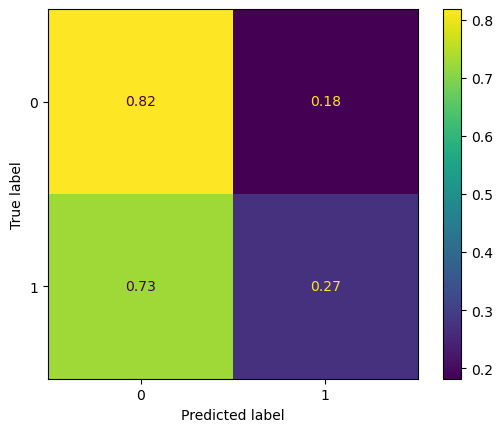

In [55]:
# RF - REG PARAMS - NO RANDOMISATION - REDUCED FEATURE SET
rf_reg_red = RandomForestClassifier(n_jobs = -1)
rf_reg_red.fit(X_prop_train_reg_red, y_prop_train_reg_red)
y_pred_rf_reg_red = rf_reg_red.predict(X_test_reg_red)


accuracy_rf_reg_red = accuracy_score(y_test_reg_red, y_pred_rf_reg_red)
red_accuracy_rf_reg_red, blue_accuracy_rf_reg_red = calculate_class_accuracies(y_test_reg_red, y_pred_rf_reg_red)
bal_accuracy_rf_reg_red = balanced_accuracy_score(y_test_reg_red, y_pred_rf_reg_red)


print("Overall Accuracy:", accuracy_rf_reg_red)
print("Red Accuracy:", red_accuracy_rf_reg_red)
print("Blue Accuracy:", blue_accuracy_rf_reg_red)
print("Balanced Accuracy:", bal_accuracy_rf_reg_red)


ConfusionMatrixDisplay.from_estimator(rf_reg_red, X_test_reg_red, y_test_reg_red, normalize="true")

Overall Accuracy: 0.6276595744680851
Red Accuracy: 0.8394495412844036
Blue Accuracy: 0.2631578947368421
Balanced Accuracy: 0.5513037180106228


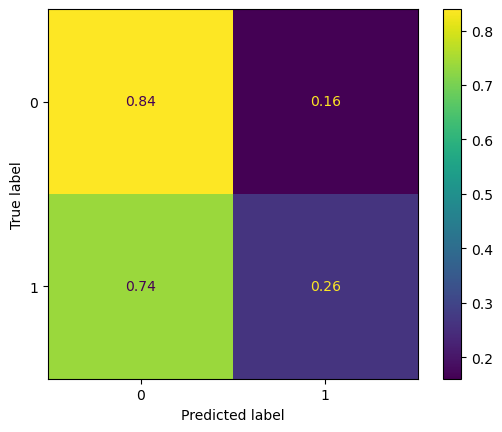

In [56]:
# RF - REG PARAMS - NO RANDOMISATION - FULL FEATURE SET
rf_reg_full = RandomForestClassifier(n_jobs = -1)
rf_reg_full.fit(X_prop_train_reg_full, y_prop_train_reg_full)
y_pred_rf_reg_full = rf_reg_full.predict(X_test_reg_full)


accuracy_rf_reg_full = accuracy_score(y_test_reg_full, y_pred_rf_reg_full)
red_accuracy_rf_reg_full, blue_accuracy_rf_reg_full = calculate_class_accuracies(y_test_reg_full, y_pred_rf_reg_full)
bal_accuracy_rf_reg_full = balanced_accuracy_score(y_test_reg_full, y_pred_rf_reg_full)


print("Overall Accuracy:", accuracy_rf_reg_full)
print("Red Accuracy:", red_accuracy_rf_reg_full)
print("Blue Accuracy:", blue_accuracy_rf_reg_full)
print("Balanced Accuracy:", bal_accuracy_rf_reg_full)


ConfusionMatrixDisplay.from_estimator(rf_reg_full, X_test_reg_full, y_test_reg_full, normalize="true")

Overall Accuracy: 0.5319148936170213
Red Accuracy: 0.6201117318435754
Blue Accuracy: 0.43661971830985913
Balanced Accuracy: 0.5283657250767173


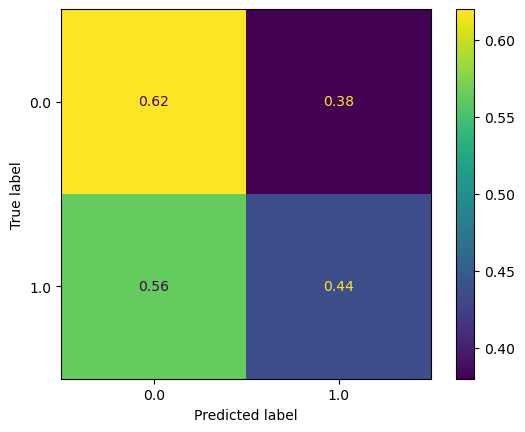

In [57]:
# RF - REG PARAMS - RANDOMISATION - REDUCED FEATURE SET
rf_rand_red = RandomForestClassifier(n_jobs = -1)
rf_rand_red.fit(X_prop_train_rand_red, y_prop_train_rand_red)
y_pred_rf_rand_red = rf_rand_red.predict(X_test_rand_red)


accuracy_rf_rand_red = accuracy_score(y_test_rand_red, y_pred_rf_rand_red)
red_accuracy_rf_rand_red, blue_accuracy_rf_rand_red = calculate_class_accuracies(y_test_rand_red, y_pred_rf_rand_red)
bal_accuracy_rf_rand_red = balanced_accuracy_score(y_test_rand_red, y_pred_rf_rand_red)


print("Overall Accuracy:", accuracy_rf_rand_red)
print("Red Accuracy:", red_accuracy_rf_rand_red)
print("Blue Accuracy:", blue_accuracy_rf_rand_red)
print("Balanced Accuracy:", bal_accuracy_rf_rand_red)


ConfusionMatrixDisplay.from_estimator(rf_rand_red, X_test_rand_red, y_test_rand_red, normalize="true")

Overall Accuracy: 0.5522243713733076
Red Accuracy: 0.6145251396648045
Blue Accuracy: 0.48490945674044267
Balanced Accuracy: 0.5497172982026236


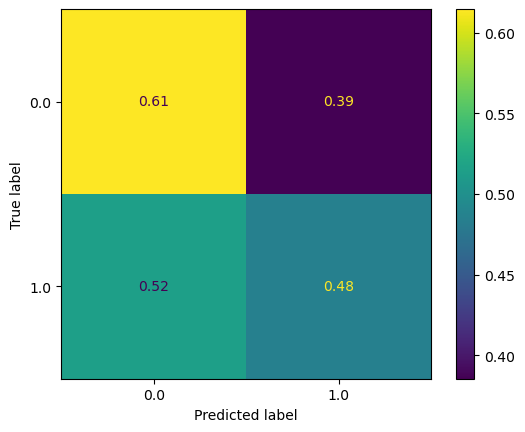

In [58]:
# RF - REG PARAMS - RANDOMISATION - FULL FEATURE SET
rf_rand_full = RandomForestClassifier(n_jobs = -1)
rf_rand_full.fit(X_prop_train_rand_full, y_prop_train_rand_full)
y_pred_rf_rand_full = rf_rand_full.predict(X_test_rand_full)

accuracy_rf_rand_full = accuracy_score(y_test_rand_full, y_pred_rf_rand_full)
red_accuracy_rf_rand_full, blue_accuracy_rf_rand_full = calculate_class_accuracies(y_test_rand_full, y_pred_rf_rand_full)
bal_accuracy_rf_rand_full = balanced_accuracy_score(y_test_rand_full, y_pred_rf_rand_full)

print("Overall Accuracy:", accuracy_rf_rand_full)
print("Red Accuracy:", red_accuracy_rf_rand_full)
print("Blue Accuracy:", blue_accuracy_rf_rand_full)
print("Balanced Accuracy:", bal_accuracy_rf_rand_full)

ConfusionMatrixDisplay.from_estimator(rf_rand_full, X_test_rand_full, y_test_rand_full, normalize="true")

Overall Accuracy: 0.6112185686653772
Red Accuracy: 0.7339449541284404
Blue Accuracy: 0.4
Balanced Accuracy: 0.5669724770642202


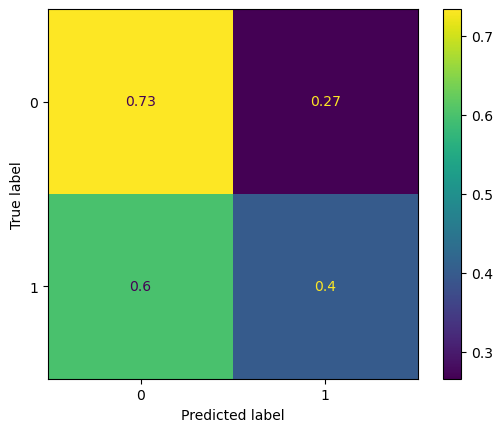

In [59]:
# RF - REG PARAMS - SMOTE - REDUCED FEATURE SET
rf_sm_red = RandomForestClassifier(n_jobs = -1)
rf_sm_red.fit(X_train_reg_red_sm, y_train_reg_red_sm)
y_pred_rf_sm_red = rf_sm_red.predict(X_test_reg_red)

accuracy_rf_sm_red = accuracy_score(y_test_reg_red, y_pred_rf_sm_red)
red_accuracy_rf_sm_red, blue_accuracy_rf_sm_red = calculate_class_accuracies(y_test_reg_red, y_pred_rf_sm_red)
bal_accuracy_rf_sm_red = balanced_accuracy_score(y_test_reg_red, y_pred_rf_sm_red)

print("Overall Accuracy:", accuracy_rf_sm_red)
print("Red Accuracy:", red_accuracy_rf_sm_red)
print("Blue Accuracy:", blue_accuracy_rf_sm_red)
print("Balanced Accuracy:", bal_accuracy_rf_sm_red)

ConfusionMatrixDisplay.from_estimator(rf_sm_red, X_test_reg_red, y_test_reg_red, normalize="true")

Overall Accuracy: 0.6121856866537717
Red Accuracy: 0.7232415902140673
Blue Accuracy: 0.42105263157894735
Balanced Accuracy: 0.5721471108965073


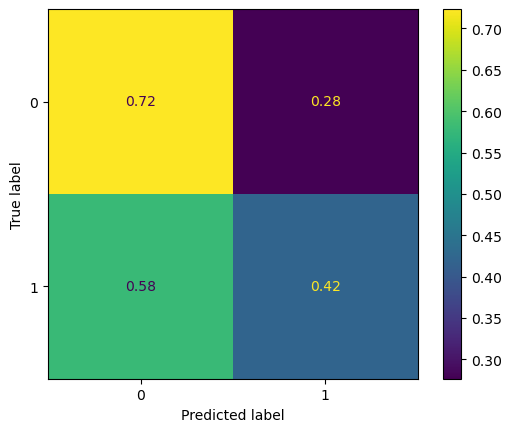

In [60]:
# RF - REG PARAMS - SMOTE - FULL FEATURE SET
rf_sm_full = RandomForestClassifier(n_jobs = -1)
rf_sm_full.fit(X_train_reg_full_sm, y_train_reg_full_sm)
y_pred_rf_sm_full = rf_sm_full.predict(X_test_reg_full)

accuracy_rf_sm_full = accuracy_score(y_test_reg_full, y_pred_rf_sm_full)
red_accuracy_rf_sm_full, blue_accuracy_rf_sm_full = calculate_class_accuracies(y_test_reg_full, y_pred_rf_sm_full)
bal_accuracy_rf_sm_full = balanced_accuracy_score(y_test_reg_full, y_pred_rf_sm_full)

print("Overall Accuracy:", accuracy_rf_sm_full)
print("Red Accuracy:", red_accuracy_rf_sm_full)
print("Blue Accuracy:", blue_accuracy_rf_sm_full)
print("Balanced Accuracy:", bal_accuracy_rf_sm_full)

ConfusionMatrixDisplay.from_estimator(rf_sm_full, X_test_reg_full, y_test_reg_full, normalize="true")

# Random Forest Optimised


In [62]:
param_space_rf = {
    'n_estimators': Integer(100, 500),          # Number of trees in the forest
    'max_depth': Integer(1, 1000),             # Maximum depth of each tree (None = unlimited)
    'min_samples_split': Integer(2, 20),        # Minimum number of samples required to split an internal node
    'min_samples_leaf': Integer(1, 10),         # Minimum number of samples required to be at a leaf node
    'max_features': Categorical(['sqrt', 'log2', None]),  # Number of features to consider when looking for the best split
    'bootstrap': Categorical([True, False]),     # Whether bootstrap samples are used when building trees
    'criterion': Categorical(['gini', 'entropy']) # The function to measure the quality of a split
}

rf_model = RandomForestClassifier(n_jobs=-1)  # Utilize all cores

bayes_search_rf = BayesSearchCV(
    estimator=rf_model,
    search_spaces=param_space_rf,
    scoring='neg_log_loss',  
    n_iter=50,  # less iterations as takes long to run
    cv=5,       
    n_jobs=-1,  
    verbose=0   
)

OrderedDict({'bootstrap': True, 'criterion': 'entropy', 'max_depth': 1000, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 500})
Overall Accuracy: 0.6199226305609284
Red Accuracy: 0.8134556574923547
Blue Accuracy: 0.2868421052631579
Balanced Accuracy: 0.5501488813777563


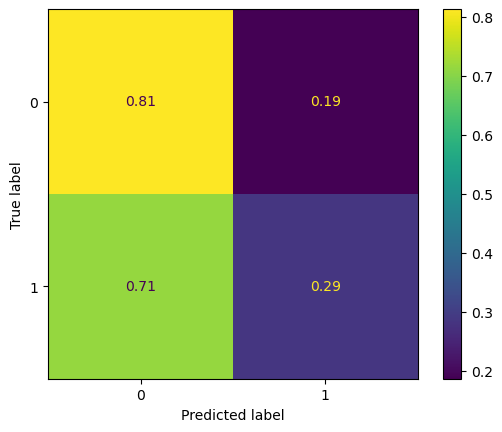

In [63]:
# RF - BEST PARAMS - NO RANDOMISATION - REDUCED FEATURE SET
# bayes_search_rf.fit(X_prop_train_reg_red, y_prop_train_reg_red)
# best_params_rf_reg_red = bayes_search_rf.best_params_
# print(best_params_rf_reg_red)

best_params_rf_reg_red = {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 1000, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 500}

rf_reg_red_opt = RandomForestClassifier(n_jobs = -1)
rf_reg_red_opt.set_params(**best_params_rf_reg_red)
rf_reg_red_opt.fit(X_prop_train_reg_red, y_prop_train_reg_red)
y_pred_rf_reg_red_opt = rf_reg_red_opt.predict(X_test_reg_red)


accuracy_rf_reg_red_opt = accuracy_score(y_test_reg_red, y_pred_rf_reg_red_opt)
red_accuracy_rf_reg_red_opt, blue_accuracy_rf_reg_red_opt = calculate_class_accuracies(y_test_reg_red, y_pred_rf_reg_red_opt)
bal_accuracy_rf_reg_red_opt = balanced_accuracy_score(y_test_reg_red, y_pred_rf_reg_red_opt)


print("Overall Accuracy:", accuracy_rf_reg_red_opt)
print("Red Accuracy:", red_accuracy_rf_reg_red_opt)
print("Blue Accuracy:", blue_accuracy_rf_reg_red_opt)
print("Balanced Accuracy:", bal_accuracy_rf_reg_red_opt)


ConfusionMatrixDisplay.from_estimator(rf_reg_red_opt, X_test_reg_red, y_test_reg_red, normalize="true")

OrderedDict({'bootstrap': True, 'criterion': 'entropy', 'max_depth': 435, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 324})
Overall Accuracy: 0.632495164410058
Red Accuracy: 0.8623853211009175
Blue Accuracy: 0.23684210526315788
Balanced Accuracy: 0.5496137131820377


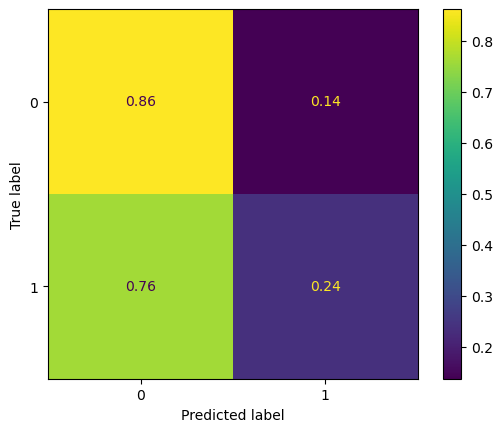

In [64]:
# RF - BEST PARAMS - NO RANDOMISATION - FULL FEATURE SET
# bayes_search_rf.fit(X_prop_train_reg_full, y_prop_train_reg_full)
# best_params_rf_reg_full = bayes_search_rf.best_params_
# print(best_params_rf_reg_full)

best_params_rf_reg_full = {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 435, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 324}

rf_reg_full_opt = RandomForestClassifier(n_jobs = -1)
rf_reg_full_opt.set_params(**best_params_rf_reg_full)
rf_reg_full_opt.fit(X_prop_train_reg_full, y_prop_train_reg_full)
y_pred_rf_reg_full_opt = rf_reg_full_opt.predict(X_test_reg_full)


accuracy_rf_reg_full_opt = accuracy_score(y_test_reg_full, y_pred_rf_reg_full_opt)
red_accuracy_rf_reg_full_opt, blue_accuracy_rf_reg_full_opt = calculate_class_accuracies(y_test_reg_full, y_pred_rf_reg_full_opt)
bal_accuracy_rf_reg_full_opt = balanced_accuracy_score(y_test_reg_full, y_pred_rf_reg_full_opt)


print("Overall Accuracy:", accuracy_rf_reg_full_opt)
print("Red Accuracy:", red_accuracy_rf_reg_full_opt)
print("Blue Accuracy:", blue_accuracy_rf_reg_full_opt)
print("Balanced Accuracy:", bal_accuracy_rf_reg_full_opt)


ConfusionMatrixDisplay.from_estimator(rf_reg_full_opt, X_test_reg_full, y_test_reg_full, normalize="true")

OrderedDict({'bootstrap': True, 'criterion': 'gini', 'max_depth': 1000, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 241})
Overall Accuracy: 0.5589941972920697
Red Accuracy: 0.5977653631284916
Blue Accuracy: 0.5171026156941649
Balanced Accuracy: 0.5574339894113283


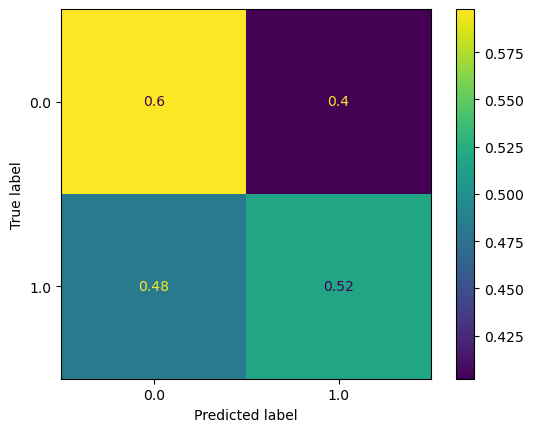

In [65]:
# RF - BEST PARAMS - RANDOMISATION - REDUCED FEATURE SET
# bayes_search_rf.fit(X_prop_train_rand_red, y_prop_train_rand_red)
# best_params_rf_rand_red = bayes_search_rf.best_params_
# print(best_params_rf_rand_red)

best_params_rf_rand_red = {'bootstrap': True, 'criterion': 'gini', 'max_depth': 1000, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 241}

rf_rand_red_opt = RandomForestClassifier(n_jobs = -1)
rf_rand_red_opt.set_params(**best_params_rf_rand_red)
rf_rand_red_opt.fit(X_prop_train_rand_red, y_prop_train_rand_red)
y_pred_rf_rand_red_opt = rf_rand_red_opt.predict(X_test_rand_red)


accuracy_rf_rand_red_opt = accuracy_score(y_test_rand_red, y_pred_rf_rand_red_opt)
red_accuracy_rf_rand_red_opt, blue_accuracy_rf_rand_red_opt = calculate_class_accuracies(y_test_rand_red, y_pred_rf_rand_red_opt)
bal_accuracy_rf_rand_red_opt = balanced_accuracy_score(y_test_rand_red, y_pred_rf_rand_red_opt)


print("Overall Accuracy:", accuracy_rf_rand_red_opt)
print("Red Accuracy:", red_accuracy_rf_rand_red_opt)
print("Blue Accuracy:", blue_accuracy_rf_rand_red_opt)
print("Balanced Accuracy:", bal_accuracy_rf_rand_red_opt)


ConfusionMatrixDisplay.from_estimator(rf_rand_red_opt, X_test_rand_red, y_test_rand_red, normalize="true")

C:\Users\rafi\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'entropy', 1000, None, 1, 20, 500] before, using random point [True, 'gini', 783, 'log2', 4, 13, 191]
  warnings.warn(
C:\Users\rafi\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'entropy', 1000, None, 1, 20, 500] before, using random point [False, 'gini', 970, None, 8, 4, 169]
  warnings.warn(
C:\Users\rafi\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'entropy', 1000, None, 1, 20, 500] before, using random point [True, 'entropy', 34, 'sqrt', 3, 13, 240]
  warnings.warn(


OrderedDict({'bootstrap': True, 'criterion': 'entropy', 'max_depth': 1000, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 500})
Overall Accuracy: 0.5657640232108317
Red Accuracy: 0.5996275605214153
Blue Accuracy: 0.5291750503018109
Balanced Accuracy: 0.564401305411613


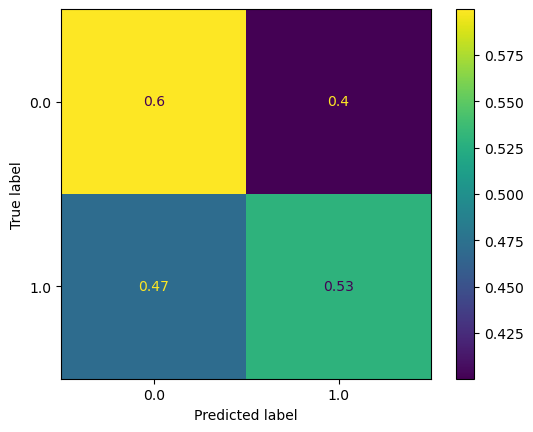

In [66]:
# RF - BEST PARAMS - RANDOMISATION - FULL FEATURE SET
# bayes_search_rf.fit(X_prop_train_rand_full, y_prop_train_rand_full)
# best_params_rf_rand_full = bayes_search_rf.best_params_
# print(best_params_rf_rand_full)

best_params_rf_rand_full = {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 1000, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 500}

rf_rand_full_opt = RandomForestClassifier(n_jobs = -1)
rf_rand_full_opt.set_params(**best_params_rf_rand_full)
rf_rand_full_opt.fit(X_prop_train_rand_full, y_prop_train_rand_full)
y_pred_rf_rand_full_opt = rf_rand_full_opt.predict(X_test_rand_full)


accuracy_rf_rand_full_opt = accuracy_score(y_test_rand_full, y_pred_rf_rand_full_opt)
red_accuracy_rf_rand_full_opt, blue_accuracy_rf_rand_full_opt = calculate_class_accuracies(y_test_rand_full, y_pred_rf_rand_full_opt)
bal_accuracy_rf_rand_full_opt = balanced_accuracy_score(y_test_rand_full, y_pred_rf_rand_full_opt)

print("Overall Accuracy:", accuracy_rf_rand_full_opt)
print("Red Accuracy:", red_accuracy_rf_rand_full_opt)
print("Blue Accuracy:", blue_accuracy_rf_rand_full_opt)
print("Balanced Accuracy:", bal_accuracy_rf_rand_full_opt)

ConfusionMatrixDisplay.from_estimator(rf_rand_full_opt, X_test_rand_full, y_test_rand_full, normalize="true")

Overall Accuracy: 0.5986460348162476
Red Accuracy: 0.6758409785932722
Blue Accuracy: 0.46578947368421053
Balanced Accuracy: 0.5708152261387414


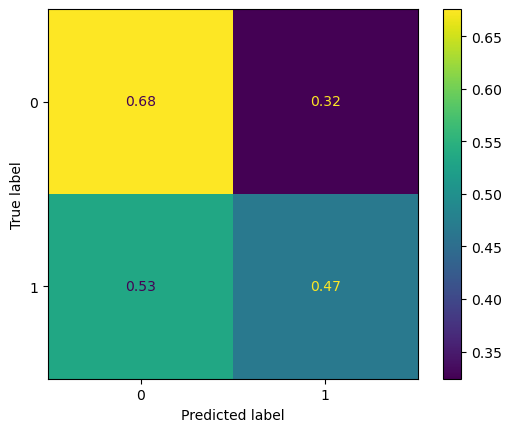

In [67]:
# RF - BEST PARAMS - SMOTE - REDUCED FEATURE SET
rf_sm_red_opt = RandomForestClassifier(n_jobs = -1)
rf_sm_red_opt.set_params(**best_params_rf_reg_red)
rf_sm_red_opt.fit(X_train_reg_red_sm, y_train_reg_red_sm)
y_pred_rf_sm_red_opt = rf_sm_red_opt.predict(X_test_reg_red)

accuracy_rf_sm_red_opt = accuracy_score(y_test_reg_red, y_pred_rf_sm_red_opt)
red_accuracy_rf_sm_red_opt, blue_accuracy_rf_sm_red_opt = calculate_class_accuracies(y_test_reg_red, y_pred_rf_sm_red_opt)
bal_accuracy_rf_sm_red_opt = balanced_accuracy_score(y_test_reg_red, y_pred_rf_sm_red_opt)

print("Overall Accuracy:", accuracy_rf_sm_red_opt)
print("Red Accuracy:", red_accuracy_rf_sm_red_opt)
print("Blue Accuracy:", blue_accuracy_rf_sm_red_opt)
print("Balanced Accuracy:", bal_accuracy_rf_sm_red_opt)

ConfusionMatrixDisplay.from_estimator(rf_sm_red_opt, X_test_reg_red, y_test_reg_red, normalize="true")

Overall Accuracy: 0.5996131528046421
Red Accuracy: 0.7110091743119266
Blue Accuracy: 0.40789473684210525
Balanced Accuracy: 0.5594519555770159


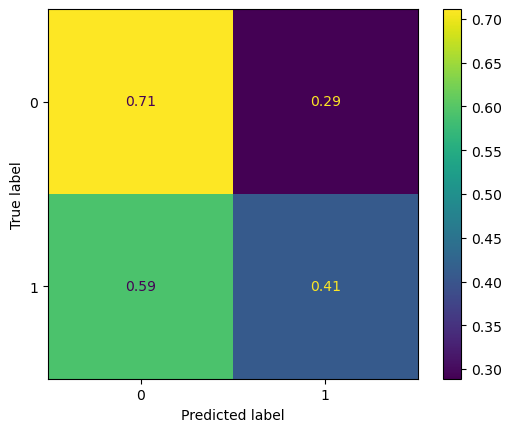

In [68]:
# RF - BEST PARAMS - SMOTE - FULL FEATURE SET
rf_sm_full_opt = RandomForestClassifier(n_jobs = -1)
rf_sm_full_opt.set_params(**best_params_rf_reg_full)
rf_sm_full_opt.fit(X_train_reg_full_sm, y_train_reg_full_sm)
y_pred_rf_sm_full_opt = rf_sm_full_opt.predict(X_test_reg_full)

accuracy_rf_sm_full_opt = accuracy_score(y_test_reg_full, y_pred_rf_sm_full_opt)
red_accuracy_rf_sm_full_opt, blue_accuracy_rf_sm_full_opt = calculate_class_accuracies(y_test_reg_full, y_pred_rf_sm_full_opt)
bal_accuracy_rf_sm_full_opt = balanced_accuracy_score(y_test_reg_full, y_pred_rf_sm_full_opt)

print("Overall Accuracy:", accuracy_rf_sm_full_opt)
print("Red Accuracy:", red_accuracy_rf_sm_full_opt)
print("Blue Accuracy:", blue_accuracy_rf_sm_full_opt)
print("Balanced Accuracy:", bal_accuracy_rf_sm_full_opt)

ConfusionMatrixDisplay.from_estimator(rf_sm_full_opt, X_test_reg_full, y_test_reg_full, normalize="true")

# Logistic Regression

Overall Accuracy: 0.6131528046421664
Red Accuracy: 0.7889908256880734
Blue Accuracy: 0.3105263157894737
Balanced Accuracy: 0.5497585707387735


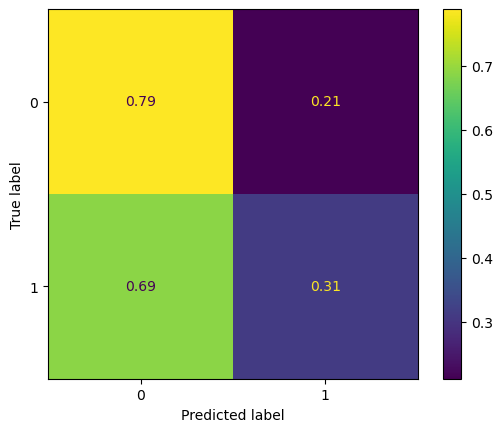

In [70]:
# LOG REG - DEFAULT - NO RANDOMISATION - REDUCED FEATURE SET
from sklearn.linear_model import LogisticRegression

lr_reg_red = LogisticRegression(penalty='l2')
lr_reg_red.fit(X_prop_train_scaled_reg_red, y_prop_train_reg_red)
y_pred_lr_reg_red = lr_reg_red.predict(X_test_scaled_reg_red)

accuracy_lr_reg_red = accuracy_score(y_test_reg_red, y_pred_lr_reg_red)
red_accuracy_lr_reg_red, blue_accuracy_lr_reg_red = calculate_class_accuracies(y_test_reg_red, y_pred_lr_reg_red)
bal_accuracy_lr_reg_red = balanced_accuracy_score(y_test_reg_red, y_pred_lr_reg_red)

print("Overall Accuracy:", accuracy_lr_reg_red)
print("Red Accuracy:", red_accuracy_lr_reg_red)
print("Blue Accuracy:", blue_accuracy_lr_reg_red)
print("Balanced Accuracy:", bal_accuracy_lr_reg_red)

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lr_reg_red, X_test_scaled_reg_red, y_test_reg_red, normalize="true")

Overall Accuracy: 0.6141199226305609
Red Accuracy: 0.7828746177370031
Blue Accuracy: 0.3236842105263158
Balanced Accuracy: 0.5532794141316595


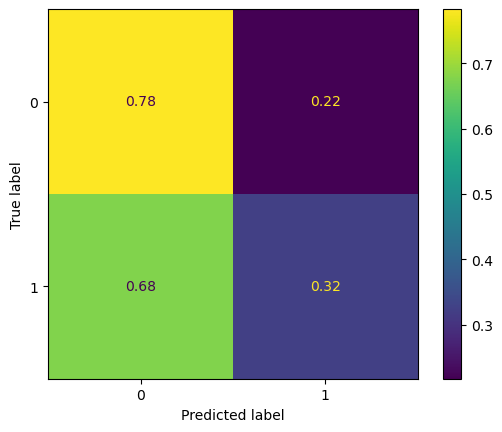

In [71]:
# LOG REG - DEFAULT - NO RANDOMISATION - FULL FEATURE SET
lr_reg_full = LogisticRegression(penalty='l2')
lr_reg_full.fit(X_prop_train_scaled_reg_full, y_prop_train_reg_full)
y_pred_lr_reg_full = lr_reg_full.predict(X_test_scaled_reg_full)

accuracy_lr_reg_full = accuracy_score(y_test_reg_full, y_pred_lr_reg_full)
red_accuracy_lr_reg_full, blue_accuracy_lr_reg_full = calculate_class_accuracies(y_test_reg_full, y_pred_lr_reg_full)
bal_accuracy_lr_reg_full = balanced_accuracy_score(y_test_reg_full, y_pred_lr_reg_full)

print("Overall Accuracy:", accuracy_lr_reg_full)
print("Red Accuracy:", red_accuracy_lr_reg_full)
print("Blue Accuracy:", blue_accuracy_lr_reg_full)
print("Balanced Accuracy:", bal_accuracy_lr_reg_full)

ConfusionMatrixDisplay.from_estimator(lr_reg_full, X_test_scaled_reg_full, y_test_reg_full, normalize="true")

Overall Accuracy: 0.5986460348162476
Red Accuracy: 0.6163873370577281
Blue Accuracy: 0.579476861167002
Balanced Accuracy: 0.5979320991123651


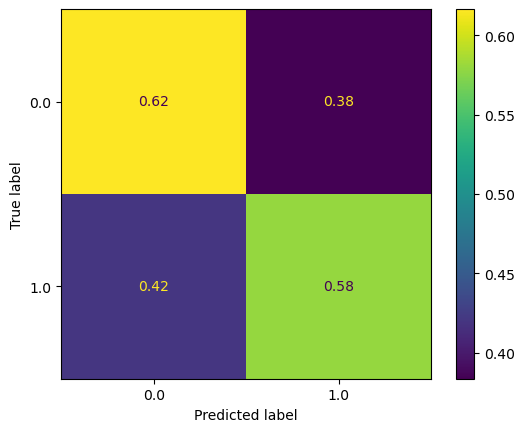

In [72]:
# LOG REG - DEFAULT - RANDOMISATION - REDUCED FEATURE SET
lr_rand_red = LogisticRegression(penalty='l2')
lr_rand_red.fit(X_prop_train_scaled_rand_red, y_prop_train_rand_red)
y_pred_lr_rand_red = lr_rand_red.predict(X_test_scaled_rand_red)

accuracy_lr_rand_red = accuracy_score(y_test_rand_red, y_pred_lr_rand_red)
red_accuracy_lr_rand_red, blue_accuracy_lr_rand_red = calculate_class_accuracies(y_test_rand_red, y_pred_lr_rand_red)
bal_accuracy_lr_rand_red = balanced_accuracy_score(y_test_rand_red, y_pred_lr_rand_red)

print("Overall Accuracy:", accuracy_lr_rand_red)
print("Red Accuracy:", red_accuracy_lr_rand_red)
print("Blue Accuracy:", blue_accuracy_lr_rand_red)
print("Balanced Accuracy:", bal_accuracy_lr_rand_red)

ConfusionMatrixDisplay.from_estimator(lr_rand_red, X_test_scaled_rand_red, y_test_rand_red, normalize="true")

Overall Accuracy: 0.5947775628626693
Red Accuracy: 0.6145251396648045
Blue Accuracy: 0.5734406438631791
Balanced Accuracy: 0.5939828917639918


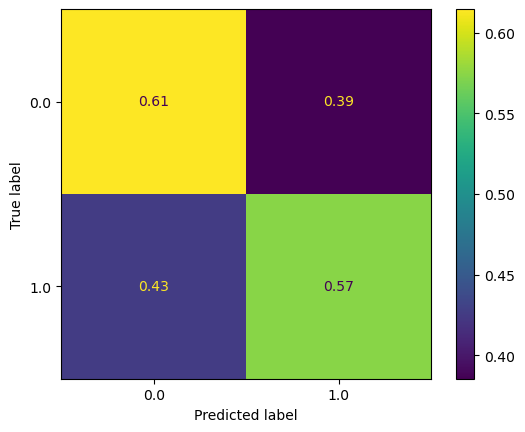

In [73]:
# LOG REG - DEFAULT - RANDOMISATION - FULL FEATURE SET
lr_rand_full = LogisticRegression(penalty='l2')
lr_rand_full.fit(X_prop_train_scaled_rand_full, y_prop_train_rand_full)
y_pred_lr_rand_full = lr_rand_full.predict(X_test_scaled_rand_full)

accuracy_lr_rand_full = accuracy_score(y_test_rand_full, y_pred_lr_rand_full)
red_accuracy_lr_rand_full, blue_accuracy_lr_rand_full = calculate_class_accuracies(y_test_rand_full, y_pred_lr_rand_full)
bal_accuracy_lr_rand_full = balanced_accuracy_score(y_test_rand_full, y_pred_lr_rand_full)

print("Overall Accuracy:", accuracy_lr_rand_full)
print("Red Accuracy:", red_accuracy_lr_rand_full)
print("Blue Accuracy:", blue_accuracy_lr_rand_full)
print("Balanced Accuracy:", bal_accuracy_lr_rand_full)

ConfusionMatrixDisplay.from_estimator(lr_rand_full, X_test_scaled_rand_full, y_test_rand_full, normalize="true")

Overall Accuracy: 0.597678916827853
Red Accuracy: 0.6039755351681957
Blue Accuracy: 0.5868421052631579
Balanced Accuracy: 0.5954088202156769


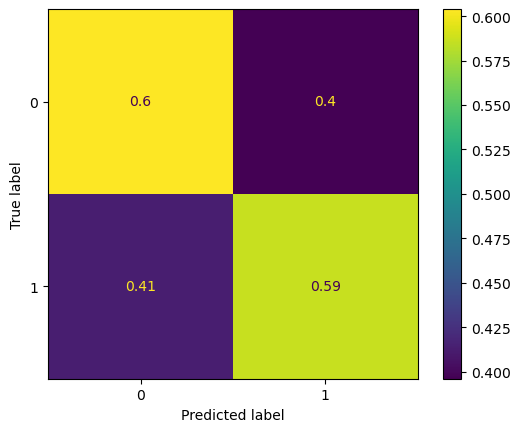

In [74]:
# LOG REG - DEFAULT - SMOTE - REDUCED FEATURE SET
lr_sm_red = LogisticRegression(penalty='l2')
lr_sm_red.fit(X_train_scaled_reg_red_sm, y_train_scaled_reg_red_sm)
y_pred_lr_sm_red = lr_sm_red.predict(X_test_scaled_reg_red)

accuracy_lr_sm_red = accuracy_score(y_test_reg_red, y_pred_lr_sm_red)
red_accuracy_lr_sm_red, blue_accuracy_lr_sm_red = calculate_class_accuracies(y_test_reg_red, y_pred_lr_sm_red)
bal_accuracy_lr_sm_red = balanced_accuracy_score(y_test_reg_red, y_pred_lr_sm_red)

print("Overall Accuracy:", accuracy_lr_sm_red)
print("Red Accuracy:", red_accuracy_lr_sm_red)
print("Blue Accuracy:", blue_accuracy_lr_sm_red)
print("Balanced Accuracy:", bal_accuracy_lr_sm_red)

ConfusionMatrixDisplay.from_estimator(lr_sm_red, X_test_scaled_reg_red, y_test_reg_red, normalize="true")

Overall Accuracy: 0.5957446808510638
Red Accuracy: 0.6024464831804281
Blue Accuracy: 0.5842105263157895
Balanced Accuracy: 0.5933285047481088


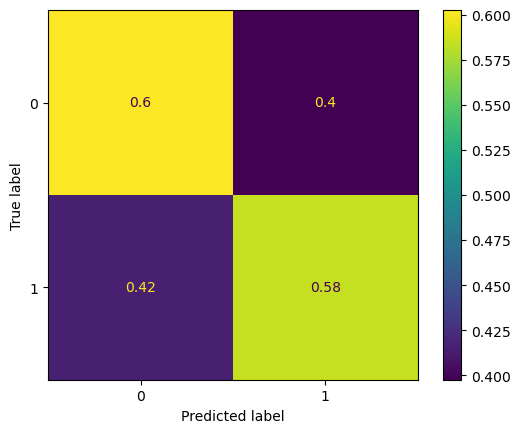

In [75]:
# LOG REG - DEFAULT - SMOTE - FULL FEATURE SET
lr_sm_full = LogisticRegression(penalty='l2')
lr_sm_full.fit(X_train_scaled_reg_full_sm, y_train_scaled_reg_full_sm)
y_pred_lr_sm_full = lr_sm_full.predict(X_test_scaled_reg_full)

accuracy_lr_sm_full = accuracy_score(y_test_reg_full, y_pred_lr_sm_full)
red_accuracy_lr_sm_full, blue_accuracy_lr_sm_full = calculate_class_accuracies(y_test_reg_full, y_pred_lr_sm_full)
bal_accuracy_lr_sm_full = balanced_accuracy_score(y_test_reg_full, y_pred_lr_sm_full)

print("Overall Accuracy:", accuracy_lr_sm_full)
print("Red Accuracy:", red_accuracy_lr_sm_full)
print("Blue Accuracy:", blue_accuracy_lr_sm_full)
print("Balanced Accuracy:", bal_accuracy_lr_sm_full)

ConfusionMatrixDisplay.from_estimator(lr_sm_full, X_test_scaled_reg_full, y_test_reg_full, normalize="true")

# Logistic Regression Optimised

In [77]:
param_space_lr = {
    'C': Real(1e-3, 1e3, prior='log-uniform'),    
    'penalty': Categorical(['l2', None]),  
    'solver': Categorical(['lbfgs', 'saga']),       
    'max_iter': Integer(100, 500),                  
    'l1_ratio': Real(0, 1, prior='uniform'),        
}

lr_model = LogisticRegression()

bayes_search_lr = BayesSearchCV(
    estimator=lr_model,
    search_spaces=param_space_lr,
    scoring='neg_log_loss',  
    n_iter=100,
    cv=5,
    n_jobs=-1,
    verbose=0
)

OrderedDict({'C': 0.01004806838142302, 'l1_ratio': 0.3598634577014192, 'max_iter': 111, 'penalty': 'l2', 'solver': 'lbfgs'})
Overall Accuracy: 0.6199226305609284
Red Accuracy: 0.8149847094801224
Blue Accuracy: 0.28421052631578947
Balanced Accuracy: 0.5495976178979559


C:\Users\rafi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\rafi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


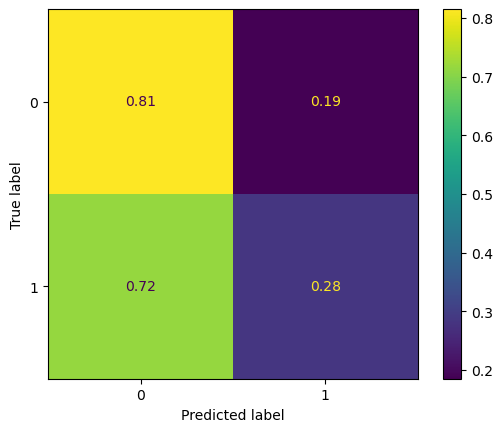

In [78]:
# LOG REG - BEST PARAMS - NO RANDOMISATION - REDUCED FEATURE SET

# bayes_search_lr.fit(X_prop_train_scaled_reg_red, y_prop_train_reg_red)
# best_params_lr_reg_red = bayes_search_lr.best_params_
# print(best_params_lr_reg_red)

best_params_lr_reg_red = {'C': 0.01004806838142302, 'l1_ratio': 0.3598634577014192, 'max_iter': 111, 'penalty': 'l2', 'solver': 'lbfgs'}


lr_reg_red_opt = LogisticRegression(penalty='l2')
lr_reg_red_opt.set_params(**best_params_lr_reg_red)
lr_reg_red_opt.fit(X_prop_train_scaled_reg_red, y_prop_train_reg_red)
y_pred_lr_reg_red_opt = lr_reg_red_opt.predict(X_test_scaled_reg_red)

accuracy_lr_reg_red_opt = accuracy_score(y_test_reg_red, y_pred_lr_reg_red_opt)
red_accuracy_lr_reg_red_opt, blue_accuracy_lr_reg_red_opt = calculate_class_accuracies(y_test_reg_red, y_pred_lr_reg_red_opt)
bal_accuracy_lr_reg_red_opt = balanced_accuracy_score(y_test_reg_red, y_pred_lr_reg_red_opt)

print("Overall Accuracy:", accuracy_lr_reg_red_opt)
print("Red Accuracy:", red_accuracy_lr_reg_red_opt)
print("Blue Accuracy:", blue_accuracy_lr_reg_red_opt)
print("Balanced Accuracy:", bal_accuracy_lr_reg_red_opt)

ConfusionMatrixDisplay.from_estimator(lr_reg_red_opt, X_test_scaled_reg_red, y_test_reg_red, normalize="true")

OrderedDict({'C': 0.00698516340870914, 'l1_ratio': 0.07259792735893165, 'max_iter': 108, 'penalty': 'l2', 'solver': 'lbfgs'})
Overall Accuracy: 0.6170212765957447
Red Accuracy: 0.8134556574923547
Blue Accuracy: 0.2789473684210526
Balanced Accuracy: 0.5462015129567037


C:\Users\rafi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\rafi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


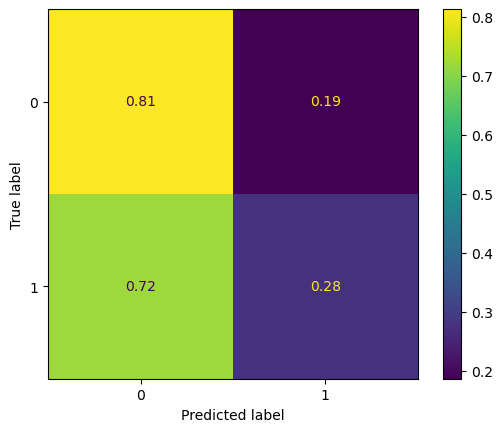

In [79]:
# LOG REG - BEST PARAMS - NO RANDOMISATION - FULL FEATURE SET
# bayes_search_lr.fit(X_prop_train_scaled_reg_full, y_prop_train_reg_full)
# best_params_lr_reg_full = bayes_search_lr.best_params_
# print(best_params_lr_reg_full)

best_params_lr_reg_full = {'C': 0.00698516340870914, 'l1_ratio': 0.07259792735893165, 'max_iter': 108, 'penalty': 'l2', 'solver': 'lbfgs'}


lr_reg_full_opt = LogisticRegression(penalty='l2')
lr_reg_full_opt.set_params(**best_params_lr_reg_full)
lr_reg_full_opt.fit(X_prop_train_scaled_reg_full, y_prop_train_reg_full)
y_pred_lr_reg_full_opt = lr_reg_full_opt.predict(X_test_scaled_reg_full)

accuracy_lr_reg_full_opt = accuracy_score(y_test_reg_full, y_pred_lr_reg_full_opt)
red_accuracy_lr_reg_full_opt, blue_accuracy_lr_reg_full_opt = calculate_class_accuracies(y_test_reg_full, y_pred_lr_reg_full_opt)
bal_accuracy_lr_reg_full_opt = balanced_accuracy_score(y_test_reg_full, y_pred_lr_reg_full_opt)

print("Overall Accuracy:", accuracy_lr_reg_full_opt)
print("Red Accuracy:", red_accuracy_lr_reg_full_opt)
print("Blue Accuracy:", blue_accuracy_lr_reg_full_opt)
print("Balanced Accuracy:", bal_accuracy_lr_reg_full_opt)


ConfusionMatrixDisplay.from_estimator(lr_reg_full_opt, X_test_scaled_reg_full, y_test_reg_full, normalize="true")

OrderedDict({'C': 0.011762878919463272, 'l1_ratio': 0.0, 'max_iter': 423, 'penalty': 'l2', 'solver': 'lbfgs'})
Overall Accuracy: 0.5938104448742747
Red Accuracy: 0.6182495344506518
Blue Accuracy: 0.5674044265593562
Balanced Accuracy: 0.5928269805050039


C:\Users\rafi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\rafi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


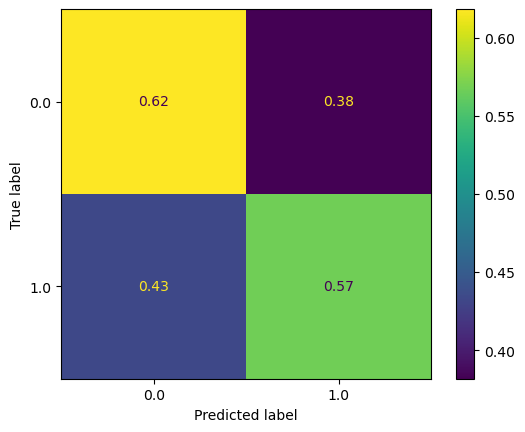

In [80]:
# LOG REG - BEST PARAMS - RANDOMISATION - REDUCED FEATURE SET
# bayes_search_lr.fit(X_prop_train_scaled_rand_red, y_prop_train_rand_red)
# best_params_lr_rand_red = bayes_search_lr.best_params_
# print(best_params_lr_rand_red)

best_params_lr_rand_red = {'C': 0.011762878919463272, 'l1_ratio': 0.0, 'max_iter': 423, 'penalty': 'l2', 'solver': 'lbfgs'}


lr_rand_red_opt = LogisticRegression(penalty='l2')
lr_rand_red_opt.set_params(**best_params_lr_rand_red)
lr_rand_red_opt.fit(X_prop_train_scaled_rand_red, y_prop_train_rand_red)
y_pred_lr_rand_red_opt = lr_rand_red_opt.predict(X_test_scaled_rand_red)

accuracy_lr_rand_red_opt = accuracy_score(y_test_rand_red, y_pred_lr_rand_red_opt)
red_accuracy_lr_rand_red_opt, blue_accuracy_lr_rand_red_opt = calculate_class_accuracies(y_test_rand_red, y_pred_lr_rand_red_opt)
bal_accuracy_lr_rand_red_opt = balanced_accuracy_score(y_test_rand_red, y_pred_lr_rand_red_opt)

print("Overall Accuracy:", accuracy_lr_rand_red_opt)
print("Red Accuracy:", red_accuracy_lr_rand_red_opt)
print("Blue Accuracy:", blue_accuracy_lr_rand_red_opt)
print("Balanced Accuracy:", bal_accuracy_lr_rand_red_opt)

ConfusionMatrixDisplay.from_estimator(lr_rand_red_opt, X_test_scaled_rand_red, y_test_rand_red, normalize="true")

OrderedDict({'C': 0.007416541388755287, 'l1_ratio': 0.9709092053324648, 'max_iter': 103, 'penalty': 'l2', 'solver': 'saga'})
Overall Accuracy: 0.6025145067698259
Red Accuracy: 0.633147113594041
Blue Accuracy: 0.5694164989939637
Balanced Accuracy: 0.6012818062940024


C:\Users\rafi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\rafi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


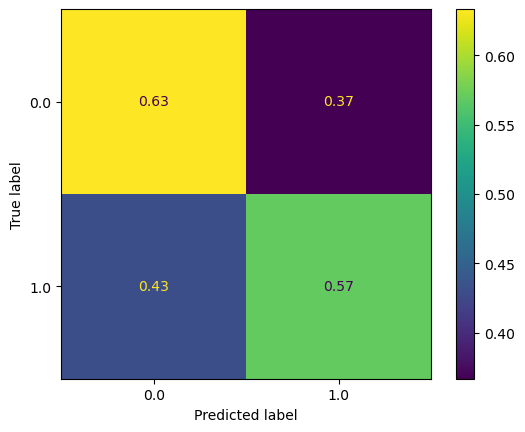

In [81]:
# LOG REG - BEST PARAMS - RANDOMISATION - FULL FEATURE SET
# bayes_search_lr.fit(X_prop_train_scaled_rand_full, y_prop_train_rand_full)
# best_params_lr_rand_full = bayes_search_lr.best_params_
# print(best_params_lr_rand_full)

best_params_lr_rand_full = {'C': 0.007416541388755287, 'l1_ratio': 0.9709092053324648, 'max_iter': 103, 'penalty': 'l2', 'solver': 'saga'}

lr_rand_full_opt = LogisticRegression(penalty='l2')
lr_rand_full_opt.set_params(**best_params_lr_rand_full)
lr_rand_full_opt.fit(X_prop_train_scaled_rand_full, y_prop_train_rand_full)
y_pred_lr_rand_full_opt = lr_rand_full_opt.predict(X_test_scaled_rand_full)

accuracy_lr_rand_full_opt = accuracy_score(y_test_rand_full, y_pred_lr_rand_full_opt)
red_accuracy_lr_rand_full_opt, blue_accuracy_lr_rand_full_opt = calculate_class_accuracies(y_test_rand_full, y_pred_lr_rand_full_opt)
bal_accuracy_lr_rand_full_opt = balanced_accuracy_score(y_test_rand_full, y_pred_lr_rand_full_opt)

print("Overall Accuracy:", accuracy_lr_rand_full_opt)
print("Red Accuracy:", red_accuracy_lr_rand_full_opt)
print("Blue Accuracy:", blue_accuracy_lr_rand_full_opt)
print("Balanced Accuracy:", bal_accuracy_lr_rand_full_opt)

ConfusionMatrixDisplay.from_estimator(lr_rand_full_opt, X_test_scaled_rand_full, y_test_rand_full, normalize="true")

Overall Accuracy: 0.5938104448742747
Red Accuracy: 0.6070336391437309
Blue Accuracy: 0.5710526315789474
Balanced Accuracy: 0.5890431353613391


C:\Users\rafi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


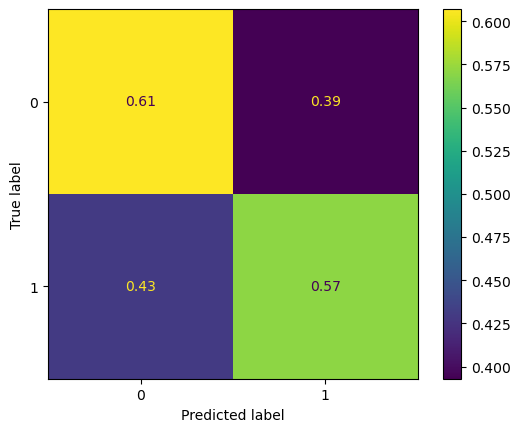

In [82]:
# LOG REG - BEST PARAMS - SMOTE - REDUCED FEATURE SET

lr_sm_red_opt = LogisticRegression(penalty='l2')
lr_sm_red_opt.set_params(**best_params_lr_reg_red)
lr_sm_red_opt.fit(X_train_scaled_reg_red_sm, y_train_scaled_reg_red_sm)
y_pred_lr_sm_red_opt = lr_sm_red_opt.predict(X_test_scaled_reg_red)

accuracy_lr_sm_red_opt = accuracy_score(y_test_reg_red, y_pred_lr_sm_red_opt)
red_accuracy_lr_sm_red_opt, blue_accuracy_lr_sm_red_opt = calculate_class_accuracies(y_test_reg_red, y_pred_lr_sm_red_opt)
bal_accuracy_lr_sm_red_opt = balanced_accuracy_score(y_test_reg_red, y_pred_lr_sm_red_opt)

print("Overall Accuracy:", accuracy_lr_sm_red_opt)
print("Red Accuracy:", red_accuracy_lr_sm_red_opt)
print("Blue Accuracy:", blue_accuracy_lr_sm_red_opt)
print("Balanced Accuracy:", bal_accuracy_lr_sm_red_opt)

ConfusionMatrixDisplay.from_estimator(lr_sm_red_opt, X_test_scaled_reg_red, y_test_reg_red, normalize="true")

C:\Users\rafi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Overall Accuracy: 0.597678916827853
Red Accuracy: 0.6146788990825688
Blue Accuracy: 0.5684210526315789
Balanced Accuracy: 0.5915499758570739


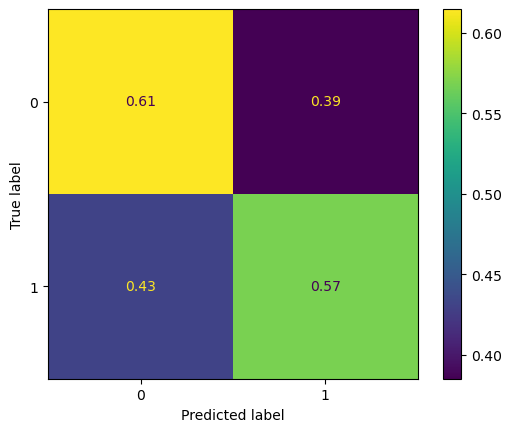

In [83]:
# LOG REG - BEST PARAMS - SMOTE - FULL FEATURE SET

lr_sm_full_opt = LogisticRegression(penalty='l2')
lr_sm_full_opt.set_params(**best_params_lr_reg_full)
lr_sm_full_opt.fit(X_train_scaled_reg_full_sm, y_train_scaled_reg_full_sm)
y_pred_lr_sm_full_opt = lr_sm_full_opt.predict(X_test_scaled_reg_full)

accuracy_lr_sm_full_opt = accuracy_score(y_test_reg_full, y_pred_lr_sm_full_opt)
red_accuracy_lr_sm_full_opt, blue_accuracy_lr_sm_full_opt = calculate_class_accuracies(y_test_reg_full, y_pred_lr_sm_full_opt)
bal_accuracy_lr_sm_full_opt = balanced_accuracy_score(y_test_reg_full, y_pred_lr_sm_full_opt)

print("Overall Accuracy:", accuracy_lr_sm_full_opt)
print("Red Accuracy:", red_accuracy_lr_sm_full_opt)
print("Blue Accuracy:", blue_accuracy_lr_sm_full_opt)
print("Balanced Accuracy:", bal_accuracy_lr_sm_full_opt)

ConfusionMatrixDisplay.from_estimator(lr_sm_full_opt, X_test_scaled_reg_full, y_test_reg_full, normalize="true")

# Model Statistics

In [85]:
# create a list to store model statistics and export as csv
model_stats = []

# Random Forest
model_stats.append(['Random Forest', 'Regular', 'Reduced', 'Regular',
                    accuracy_rf_reg_red, red_accuracy_rf_reg_red, blue_accuracy_rf_reg_red, bal_accuracy_rf_reg_red])
model_stats.append(['Random Forest', 'Regular', 'Full', 'Regular',
                    accuracy_rf_reg_full, red_accuracy_rf_reg_full, blue_accuracy_rf_reg_full, bal_accuracy_rf_reg_full])
model_stats.append(['Random Forest', 'Randomised', 'Reduced', 'Regular',
                    accuracy_rf_rand_red, red_accuracy_rf_rand_red, blue_accuracy_rf_rand_red, bal_accuracy_rf_rand_red])
model_stats.append(['Random Forest', 'Randomised', 'Full', 'Regular',
                    accuracy_rf_rand_full, red_accuracy_rf_rand_full, blue_accuracy_rf_rand_full, bal_accuracy_rf_rand_full])
model_stats.append(['Random Forest', 'Regular', 'Reduced', 'Best',
                    accuracy_rf_reg_red_opt, red_accuracy_rf_reg_red_opt, blue_accuracy_rf_reg_red_opt, bal_accuracy_rf_reg_red_opt])
model_stats.append(['Random Forest', 'Regular', 'Full', 'Best',
                    accuracy_rf_reg_full_opt, red_accuracy_rf_reg_full_opt, blue_accuracy_rf_reg_full_opt, bal_accuracy_rf_reg_full_opt])
model_stats.append(['Random Forest', 'Randomised', 'Reduced', 'Best',
                    accuracy_rf_rand_red_opt, red_accuracy_rf_rand_red_opt, blue_accuracy_rf_rand_red_opt, bal_accuracy_rf_rand_red_opt])
model_stats.append(['Random Forest', 'Randomised', 'Full', 'Best',
                    accuracy_rf_rand_full_opt, red_accuracy_rf_rand_full_opt, blue_accuracy_rf_rand_full_opt, bal_accuracy_rf_rand_full_opt])
model_stats.append(['Random Forest', 'SMOTE', 'Reduced', 'Regular',
                    accuracy_rf_sm_red, red_accuracy_rf_sm_red, blue_accuracy_rf_sm_red, bal_accuracy_rf_sm_red])
model_stats.append(['Random Forest', 'SMOTE', 'Full', 'Regular',
                    accuracy_rf_sm_full, red_accuracy_rf_sm_full, blue_accuracy_rf_sm_full, bal_accuracy_rf_sm_full])
model_stats.append(['Random Forest', 'SMOTE', 'Reduced', 'Best',
                    accuracy_rf_sm_red_opt, red_accuracy_rf_sm_red_opt, blue_accuracy_rf_sm_red_opt, bal_accuracy_rf_sm_red_opt])
model_stats.append(['Random Forest', 'SMOTE', 'Full', 'Best',
                    accuracy_rf_sm_full_opt, red_accuracy_rf_sm_full_opt, blue_accuracy_rf_sm_full_opt, bal_accuracy_rf_sm_full_opt])

# XGBoost
model_stats.append(['XGBoost', 'Regular', 'Reduced', 'Regular',
                    accuracy_xgb_reg_red, red_accuracy_xgb_reg_red, blue_accuracy_xgb_reg_red, bal_accuracy_xgb_reg_red])
model_stats.append(['XGBoost', 'Regular', 'Full', 'Regular',
                    accuracy_xgb_reg_full, red_accuracy_xgb_reg_full, blue_accuracy_xgb_reg_full, bal_accuracy_xgb_reg_full])
model_stats.append(['XGBoost', 'Randomised', 'Reduced', 'Regular',
                    accuracy_xgb_rand_red, red_accuracy_xgb_rand_red, blue_accuracy_xgb_rand_red, bal_accuracy_xgb_rand_red])
model_stats.append(['XGBoost', 'Randomised', 'Full', 'Regular',
                    accuracy_xgb_rand_full, red_accuracy_xgb_rand_full, blue_accuracy_xgb_rand_full, bal_accuracy_xgb_rand_full])
model_stats.append(['XGBoost', 'Regular', 'Reduced', 'Best',
                    accuracy_xgb_reg_red_opt, red_accuracy_xgb_reg_red_opt, blue_accuracy_xgb_reg_red_opt, bal_accuracy_xgb_reg_red_opt])
model_stats.append(['XGBoost', 'Regular', 'Full', 'Best',
                    accuracy_xgb_reg_full_opt, red_accuracy_xgb_reg_full_opt, blue_accuracy_xgb_reg_full_opt, bal_accuracy_xgb_reg_full_opt])
model_stats.append(['XGBoost', 'Randomised', 'Reduced', 'Best',
                    accuracy_xgb_rand_red_opt, red_accuracy_xgb_rand_red_opt, blue_accuracy_xgb_rand_red_opt, bal_accuracy_xgb_rand_red_opt])
model_stats.append(['XGBoost', 'Randomised', 'Full', 'Best',
                    accuracy_xgb_rand_full_opt, red_accuracy_xgb_rand_full_opt, blue_accuracy_xgb_rand_full_opt, bal_accuracy_xgb_rand_full_opt])
model_stats.append(['XGBoost', 'SMOTE', 'Reduced', 'Regular',
                    accuracy_xgb_sm_red, red_accuracy_xgb_sm_red, blue_accuracy_xgb_sm_red, bal_accuracy_xgb_sm_red])
model_stats.append(['XGBoost', 'SMOTE', 'Full', 'Regular',
                    accuracy_xgb_sm_full, red_accuracy_xgb_sm_full, blue_accuracy_xgb_sm_full, bal_accuracy_xgb_sm_full])
model_stats.append(['XGBoost', 'SMOTE', 'Reduced', 'Best',
                    accuracy_xgb_sm_red_opt, red_accuracy_xgb_sm_red_opt, blue_accuracy_xgb_sm_red_opt, bal_accuracy_xgb_sm_red_opt])
model_stats.append(['XGBoost', 'SMOTE', 'Full', 'Best',
                    accuracy_xgb_sm_full_opt, red_accuracy_xgb_sm_full_opt, blue_accuracy_xgb_sm_full_opt, bal_accuracy_xgb_sm_full_opt])



# Logistic Regression
model_stats.append(['Logistic Regression', 'Regular', 'Reduced', 'Regular',
                    accuracy_lr_reg_red, red_accuracy_lr_reg_red, blue_accuracy_lr_reg_red, bal_accuracy_lr_reg_red])
model_stats.append(['Logistic Regression', 'Regular', 'Full', 'Regular',
                    accuracy_lr_reg_full, red_accuracy_lr_reg_full, blue_accuracy_lr_reg_full, bal_accuracy_lr_reg_full])
model_stats.append(['Logistic Regression', 'Randomised', 'Reduced', 'Regular',
                    accuracy_lr_rand_red, red_accuracy_lr_rand_red, blue_accuracy_lr_rand_red, bal_accuracy_lr_rand_red])
model_stats.append(['Logistic Regression', 'Randomised', 'Full', 'Regular',
                    accuracy_lr_rand_full, red_accuracy_lr_rand_full, blue_accuracy_lr_rand_full, bal_accuracy_lr_rand_full])
model_stats.append(['Logistic Regression', 'Regular', 'Reduced', 'Best',
                    accuracy_lr_reg_red_opt, red_accuracy_lr_reg_red_opt, blue_accuracy_lr_reg_red_opt, bal_accuracy_lr_reg_red_opt])
model_stats.append(['Logistic Regression', 'Regular', 'Full', 'Best',
                    accuracy_lr_reg_full_opt, red_accuracy_lr_reg_full_opt, blue_accuracy_lr_reg_full_opt, bal_accuracy_lr_reg_full_opt])
model_stats.append(['Logistic Regression', 'Randomised', 'Reduced', 'Best',
                    accuracy_lr_rand_red_opt, red_accuracy_lr_rand_red_opt, blue_accuracy_lr_rand_red_opt, bal_accuracy_lr_rand_red_opt])
model_stats.append(['Logistic Regression', 'Randomised', 'Full', 'Best',
                    accuracy_lr_rand_full_opt, red_accuracy_lr_rand_full_opt, blue_accuracy_lr_rand_full_opt, bal_accuracy_lr_rand_full_opt])
model_stats.append(['Logistic Regression', 'SMOTE', 'Reduced', 'Regular',
                    accuracy_lr_sm_red, red_accuracy_lr_sm_red, blue_accuracy_lr_sm_red, bal_accuracy_lr_sm_red])
model_stats.append(['Logistic Regression', 'SMOTE', 'Full', 'Regular',
                    accuracy_lr_sm_full, red_accuracy_lr_sm_full, blue_accuracy_lr_sm_full, bal_accuracy_lr_sm_full])
model_stats.append(['Logistic Regression', 'SMOTE', 'Reduced', 'Best',
                    accuracy_lr_sm_red_opt, red_accuracy_lr_sm_red_opt, blue_accuracy_lr_sm_red_opt, bal_accuracy_lr_sm_red_opt])
model_stats.append(['Logistic Regression', 'SMOTE', 'Full', 'Best',
                    accuracy_lr_sm_full_opt, red_accuracy_lr_sm_full_opt, blue_accuracy_lr_sm_full_opt, bal_accuracy_lr_sm_full_opt])

df_model_stats = pd.DataFrame(model_stats, columns=['Model', 'Technique', 'Feature Set', 'Hyperparameter Choice',
                                                   'Accuracy', 'Red Accuracy', 'Blue Accuracy', 'Balanced Accuracy'])


In [86]:
df_model_stats.to_csv("model_stats.csv")

In [87]:
# get best performing models by model type

df_model_stats_sorted = df_model_stats.sort_values(by='Balanced Accuracy', ascending=False)

top_xgb = df_model_stats_sorted[df_model_stats_sorted['Model'] == 'XGBoost'].iloc[0]
top_rf = df_model_stats_sorted[df_model_stats_sorted['Model'] == 'Random Forest'].iloc[0]
top_lr = df_model_stats_sorted[df_model_stats_sorted['Model'] == 'Logistic Regression'].iloc[0]

# display the top models
print("Top XGBoost Model:")
print(top_xgb)
print("\nTop Random Forest Model:")
print(top_rf)
print("\nTop Logistic Regression Model:")
print(top_lr)


Top XGBoost Model:
Model                     XGBoost
Technique                   SMOTE
Feature Set                  Full
Hyperparameter Choice        Best
Accuracy                 0.603482
Red Accuracy             0.646789
Blue Accuracy            0.528947
Balanced Accuracy        0.587868
Name: 23, dtype: object

Top Random Forest Model:
Model                    Random Forest
Technique                        SMOTE
Feature Set                       Full
Hyperparameter Choice          Regular
Accuracy                      0.612186
Red Accuracy                  0.723242
Blue Accuracy                 0.421053
Balanced Accuracy             0.572147
Name: 9, dtype: object

Top Logistic Regression Model:
Model                    Logistic Regression
Technique                         Randomised
Feature Set                             Full
Hyperparameter Choice                   Best
Accuracy                            0.602515
Red Accuracy                        0.633147
Blue Accuracy         

In [88]:
df_rf_stats = df_model_stats[df_model_stats['Model'] == 'Random Forest']
df_xgb_stats = df_model_stats[df_model_stats['Model'] == 'XGBoost']
df_lr_stats = df_model_stats[df_model_stats['Model'] == 'Logistic Regression']

In [89]:
df_rf_stats

,Model,Technique,Feature Set,Hyperparameter Choice,Accuracy,Red Accuracy,Blue Accuracy,Balanced Accuracy
0,Random Forest,Regular,Reduced,Regular,0.617988,0.818043,0.273684,0.545864
1,Random Forest,Regular,Full,Regular,0.627660,0.839450,0.263158,0.551304
2,Random Forest,Randomised,Reduced,Regular,0.531915,0.620112,0.436620,0.528366
3,Random Forest,Randomised,Full,Regular,0.552224,0.614525,0.484909,0.549717
4,Random Forest,Regular,Reduced,Best,0.619923,0.813456,0.286842,0.550149
5,Random Forest,Regular,Full,Best,0.632495,0.862385,0.236842,0.549614
6,Random Forest,Randomised,Reduced,Best,0.558994,0.597765,0.517103,0.557434
7,Random Forest,Randomised,Full,Best,0.565764,0.599628,0.529175,0.564401
8,Random Forest,SMOTE,Reduced,Regular,0.611219,0.733945,0.400000,0.566972
9,Random Forest,SMOTE,Full,Regular,0.612186,0.723242,0.421053,0.572147


In [90]:
df_xgb_stats

,Model,Technique,Feature Set,Hyperparameter Choice,Accuracy,Red Accuracy,Blue Accuracy,Balanced Accuracy
12,XGBoost,Regular,Reduced,Regular,0.598646,0.727829,0.376316,0.552072
13,XGBoost,Regular,Full,Regular,0.589942,0.711009,0.381579,0.546294
14,XGBoost,Randomised,Reduced,Regular,0.558027,0.599628,0.513078,0.556353
15,XGBoost,Randomised,Full,Regular,0.563830,0.592179,0.533199,0.562689
16,XGBoost,Regular,Reduced,Best,0.616054,0.799694,0.300000,0.549847
17,XGBoost,Regular,Full,Best,0.615087,0.814985,0.271053,0.543019
18,XGBoost,Randomised,Reduced,Best,0.553191,0.597765,0.505030,0.551398
19,XGBoost,Randomised,Full,Best,0.564797,0.581006,0.547284,0.564145
20,XGBoost,SMOTE,Reduced,Regular,0.570600,0.659021,0.418421,0.538721
21,XGBoost,SMOTE,Full,Regular,0.598646,0.678899,0.460526,0.569713


In [91]:
df_lr_stats

,Model,Technique,Feature Set,Hyperparameter Choice,Accuracy,Red Accuracy,Blue Accuracy,Balanced Accuracy
24,Logistic Regression,Regular,Reduced,Regular,0.613153,0.788991,0.310526,0.549759
25,Logistic Regression,Regular,Full,Regular,0.614120,0.782875,0.323684,0.553279
26,Logistic Regression,Randomised,Reduced,Regular,0.598646,0.616387,0.579477,0.597932
27,Logistic Regression,Randomised,Full,Regular,0.594778,0.614525,0.573441,0.593983
28,Logistic Regression,Regular,Reduced,Best,0.619923,0.814985,0.284211,0.549598
29,Logistic Regression,Regular,Full,Best,0.617021,0.813456,0.278947,0.546202
30,Logistic Regression,Randomised,Reduced,Best,0.593810,0.618250,0.567404,0.592827
31,Logistic Regression,Randomised,Full,Best,0.602515,0.633147,0.569416,0.601282
32,Logistic Regression,SMOTE,Reduced,Regular,0.597679,0.603976,0.586842,0.595409
33,Logistic Regression,SMOTE,Full,Regular,0.595745,0.602446,0.584211,0.593329


# SHAP

In [93]:
!pip install shap

In [238]:
import shap
shap.initjs()

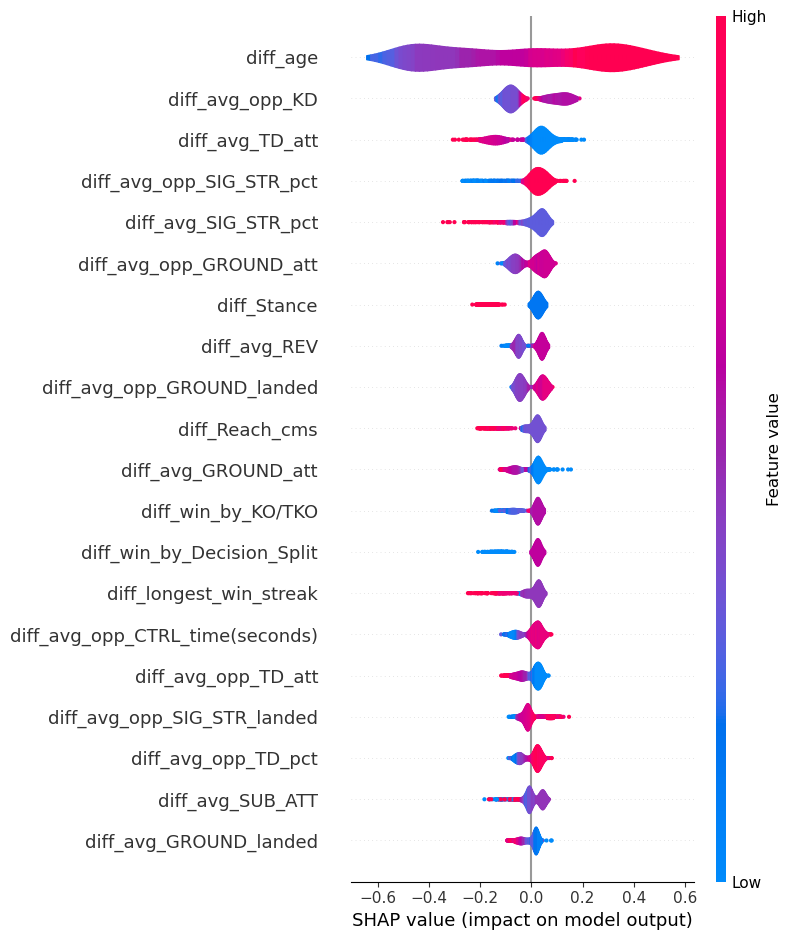

In [240]:
# XGBoost explainability
# initiate explainer for model and calculate shap values for training set

explainer_xgb_best = shap.TreeExplainer(xgb_sm_full_opt)
shap_values_xgb_best = explainer_xgb_best.shap_values(X_test_reg_full)
feature_names = X_test_reg_full.columns

shap.summary_plot(shap_values_xgb_best, X_test_reg_full ,plot_type="violin")

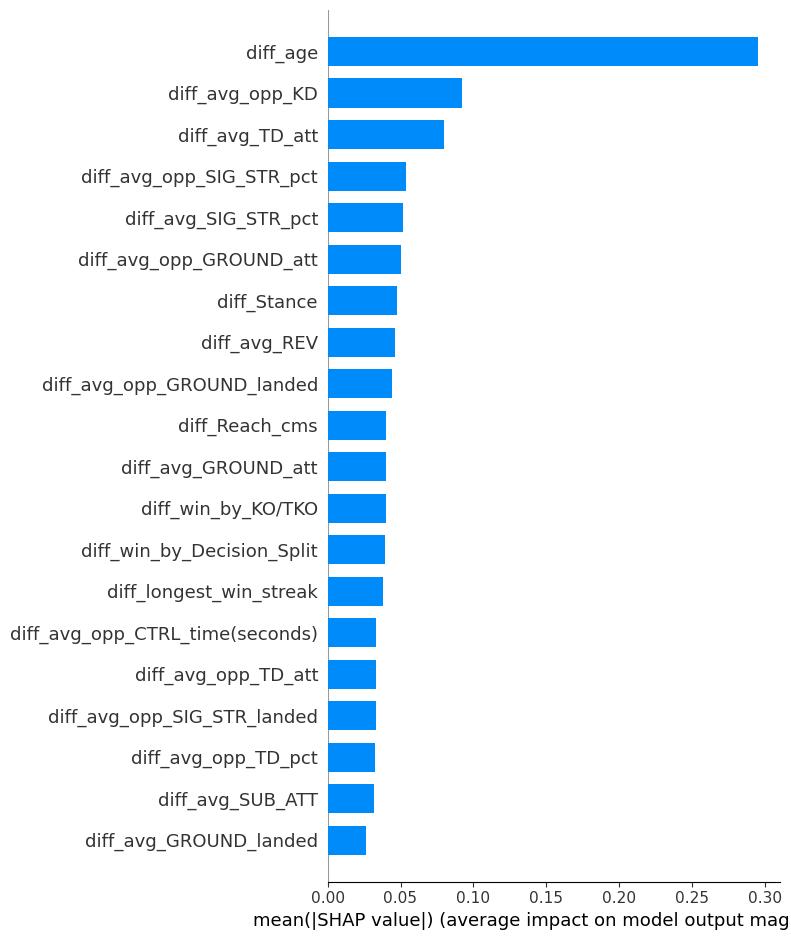

In [244]:
shap.summary_plot(shap_values_xgb_best,X_test_reg_full ,plot_type="bar")

In [246]:
shap_sum = np.abs(shap_values_xgb_best).mean(axis=0)

df_shap = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Value (Avg)': shap_sum
})

df_shap = df_shap.sort_values('SHAP Value (Avg)', ascending=False)

df_shap


,Feature,SHAP Value (Avg)
67,diff_age,0.295793
1,diff_avg_opp_KD,0.092459
18,diff_avg_TD_att,0.079834
3,diff_avg_opp_SIG_STR_pct,0.054028
2,diff_avg_SIG_STR_pct,0.051538
...,...,...
22,diff_avg_HEAD_att,0.000482
34,diff_avg_DISTANCE_att,0.000451
62,diff_win_by_TKO_Doctor_Stoppage,0.000287
56,diff_draw,0.000000


 99%|===================| 2039/2068 [00:46<00:00]        

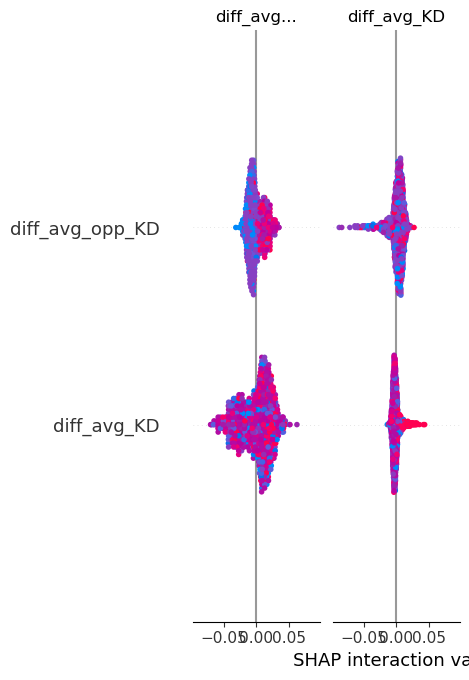

In [252]:
# Random Forest explainability
explainer_rf_best = shap.TreeExplainer(rf_sm_full,X_test_reg_full)
shap_values_rf_best = explainer_rf_best.shap_values(X_test_reg_full,check_additivity=False)
feature_names = X_test_reg_full.columns
shap.summary_plot(shap_values_rf_best, X_test_reg_full, feature_names = feature_names, plot_type="bar")

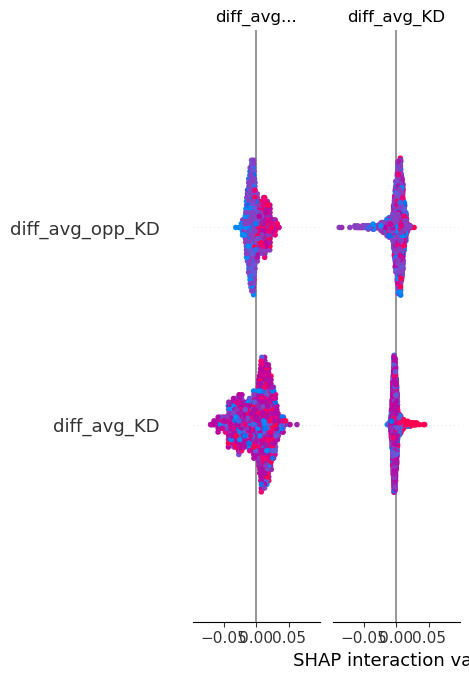

In [254]:
shap.summary_plot(shap_values_rf_best, X_test_reg_full, feature_names = feature_names, plot_type="violin")

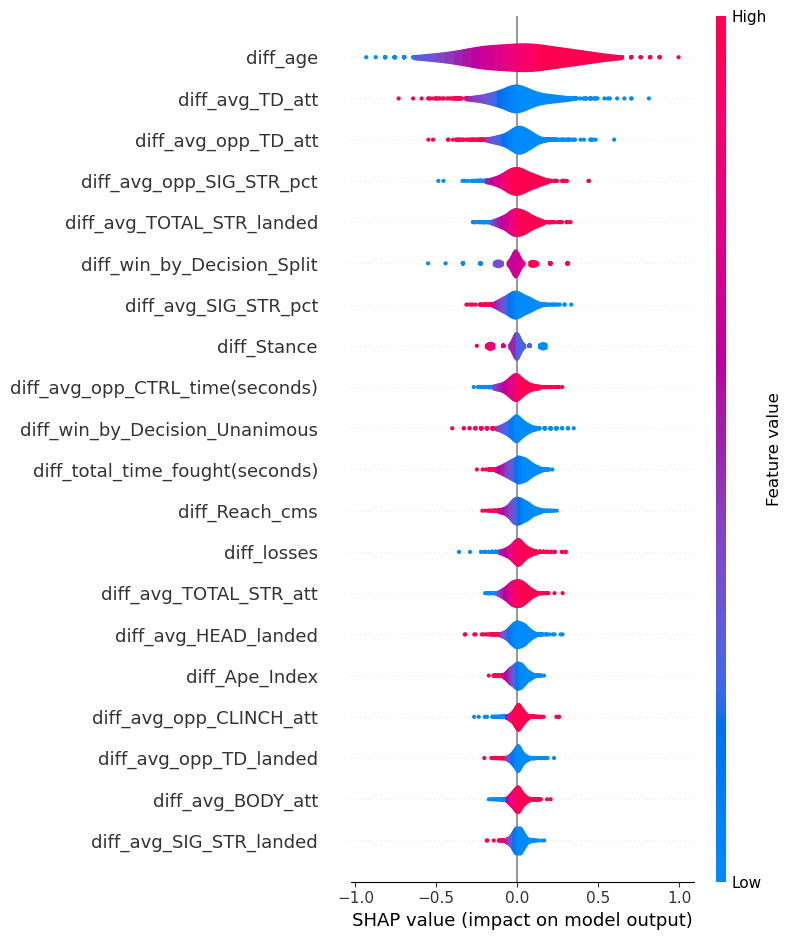

In [256]:
# Logistic Regression explainability
explainer_lr_best = shap.LinearExplainer(lr_rand_full_opt, X_test_scaled_rand_full)
shap_values_lr_best = explainer_lr_best.shap_values(X_test_scaled_rand_full)

# get feature names from unscaled due to how sci-kit learn removes column names
feature_names = X_test_rand_full.columns

shap.summary_plot(shap_values_lr_best, X_test_scaled_rand_full, feature_names=feature_names, plot_type="violin")


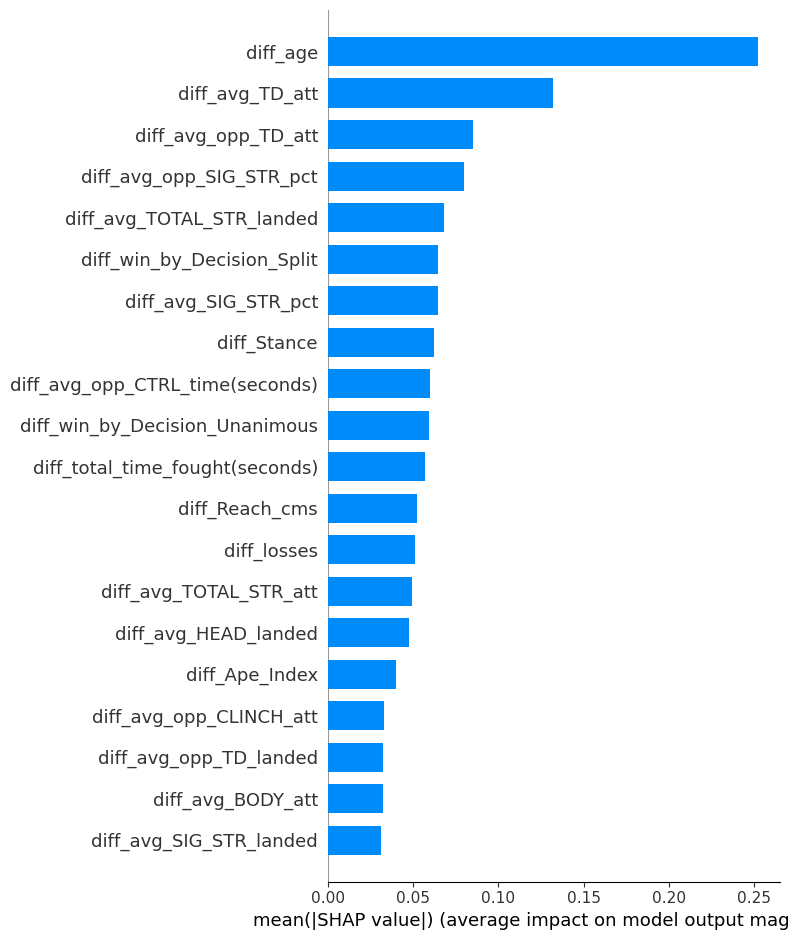

In [258]:
shap.summary_plot(shap_values_lr_best, X_test_scaled_rand_full, feature_names=feature_names, plot_type="bar")

# Conformal Prediction

In [103]:
# !pip install crepes

In [104]:
from crepes import (ConformalClassifier,
                    ConformalRegressor,
                    ConformalPredictiveSystem,
                    __version__)
from crepes import WrapClassifier, WrapRegressor, __version__
from crepes.extras import hinge, margin, binning, DifficultyEstimator

In [260]:
# xgboost conformal predictor fitting / calibration

xgb_sm_full_opt_conf = WrapClassifier(XGBClassifier(objective='binary:logistic',random_state =1))
xgb_sm_full_opt_conf.learner.set_params(**best_params_xgb_reg_full)
xgb_sm_full_opt_conf.fit(X_train_reg_full_sm, y_train_reg_full_sm)
xgb_sm_full_opt_conf.calibrate(X_cal_reg_full,y_cal_reg_full)


WrapClassifier(learner=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.7825956568864338, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02298430886265549,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...), calibrated=True, predictor=ConformalClassifier(fitted=True, mondrian=False))

In [262]:
# get evaluation metrics at 95%
xgb_sm_full_opt_conf.evaluate(X_test_reg_full, y_test_reg_full,confidence=0.95)

{'error': 0.07059961315280461,
 'avg_c': 1.7553191489361701,
 'one_c': 0.24468085106382978,
 'empty': 0.0,
 'time_fit': 0.0,
 'time_evaluate': 0.038103580474853516}

In [264]:
# also get evaluation metrics at 80%
xgb_sm_full_opt_conf.evaluate(X_test_reg_full, y_test_reg_full,confidence=0.8)

{'error': 0.21083172147001938,
 'avg_c': 1.4110251450676983,
 'one_c': 0.5889748549323017,
 'empty': 0.0,
 'time_fit': 0.0,
 'time_evaluate': 0.03765082359313965}

In [266]:
# Random Forest conformal predictor
rf_sm_full_conf = WrapClassifier(RandomForestClassifier(n_jobs = -1))
rf_sm_full_conf.fit(X_train_reg_full_sm, y_train_reg_full_sm)
rf_sm_full_conf.calibrate(X_cal_reg_full,y_cal_reg_full)

WrapClassifier(learner=RandomForestClassifier(n_jobs=-1), calibrated=True, predictor=ConformalClassifier(fitted=True, mondrian=False))

In [268]:
rf_sm_full_conf.evaluate(X_test_reg_full, y_test_reg_full,confidence=0.95)

{'error': 0.06479690522243708,
 'avg_c': 1.7920696324951644,
 'one_c': 0.2079303675048356,
 'empty': 0.0,
 'time_fit': 0.0,
 'time_evaluate': 0.043929100036621094}

In [270]:
rf_sm_full_conf.evaluate(X_test_reg_full, y_test_reg_full,confidence=0.8)

{'error': 0.20502901353965186,
 'avg_c': 1.3974854932301741,
 'one_c': 0.6025145067698259,
 'empty': 0.0,
 'time_fit': 0.0,
 'time_evaluate': 0.04379630088806152}

In [272]:
#Logistic Regression conformal predictor
lr_rand_full_conf = WrapClassifier(LogisticRegression(penalty='l2'))
lr_rand_full_conf.fit(X_prop_train_scaled_rand_full, y_prop_train_rand_full)
lr_rand_full_conf.calibrate(X_cal_scaled_rand_full,y_cal_rand_full)


WrapClassifier(learner=LogisticRegression(), calibrated=True, predictor=ConformalClassifier(fitted=True, mondrian=False))

In [274]:
lr_rand_full_conf.evaluate(X_test_scaled_rand_full, y_test_rand_full,confidence=0.95)

{'error': 0.07640232108317213,
 'avg_c': 1.7823984526112187,
 'one_c': 0.21760154738878143,
 'empty': 0.0,
 'time_fit': 0.0,
 'time_evaluate': 0.018042325973510742}

In [276]:
lr_rand_full_conf.evaluate(X_test_scaled_rand_full, y_test_rand_full,confidence=0.8)

{'error': 0.2514506769825918,
 'avg_c': 1.3529980657640233,
 'one_c': 0.6470019342359767,
 'empty': 0.0,
 'time_fit': 0.0,
 'time_evaluate': 0.017552852630615234}

In [280]:
# get prediction sets for each model
prediction_sets_xgb = xgb_sm_full_opt_conf.predict_set(X_test_reg_full,confidence=0.95)
prediction_sets_rf = rf_sm_full_conf.predict_set(X_test_reg_full,confidence=0.95)
prediction_sets_lr = lr_rand_full_conf.predict_set(X_test_scaled_rand_full,confidence=0.95)

In [282]:
# get indexes of sets that had single value

def single_value_index(prediction_set):
  single_value_index = []
  for i in range(len(prediction_set)):
    if np.sum(prediction_set[i]) == 1:
      single_value_index.append(i)
  one_c = len(single_value_index) / len(prediction_set)
  print(one_c)
  return single_value_index

In [284]:
single_val_rf = single_value_index(prediction_sets_rf)
single_val_xgb = single_value_index(prediction_sets_xgb)
single_val_lr = single_value_index(prediction_sets_lr)

0.2079303675048356
0.24468085106382978
0.21760154738878143


In [286]:
# get the actual values from the test set which have single value prediction sets

rf_one_c_X = X_test_reg_full.iloc[single_val_rf]
rf_one_c_y = y_test_reg_full.iloc[single_val_rf]
rf_one_c = pd.concat([rf_one_c_X, rf_one_c_y], axis=1)

xgb_one_c_X = X_test_reg_full.iloc[single_val_xgb]
xgb_one_c_y = y_test_reg_full.iloc[single_val_xgb]
xgb_one_c = pd.concat([xgb_one_c_X, xgb_one_c_y], axis=1)


In [290]:
lr_one_c_X = X_test_rand_full.iloc[single_val_lr]
lr_one_c_y = y_test_rand_full.iloc[single_val_lr]
lr_one_c = pd.concat([lr_one_c_X, lr_one_c_y],axis=1)

In [288]:
# get set which contains the test data WITHOUT the samples which are in the single value index

# random forest
rf_remaining_indices = [i for i in range(len(X_test_reg_full)) if i not in single_val_rf]
rf_remaining_X = X_test_reg_full.iloc[rf_remaining_indices]
rf_remaining_y = y_test_reg_full.iloc[rf_remaining_indices]
rf_remaining = pd.concat([rf_remaining_X, rf_remaining_y], axis=1)

# xgboost
xgb_remaining_indices = [i for i in range(len(X_test_reg_full)) if i not in single_val_xgb]
xgb_remaining_X = X_test_reg_full.iloc[xgb_remaining_indices]
xgb_remaining_y = y_test_reg_full.iloc[xgb_remaining_indices]
xgb_remaining = pd.concat([xgb_remaining_X, xgb_remaining_y], axis=1)

# logiistic regression
lr_remaining_indices = [i for i in range(len(X_test_rand_full)) if i not in single_val_lr]
lr_remaining_X = X_test_rand_full.iloc[lr_remaining_indices]
lr_remaining_y = y_test_rand_full.iloc[lr_remaining_indices]
lr_remaining_X.reset_index(drop=True, inplace=True)
lr_remaining_y.reset_index(drop=True, inplace=True)
lr_remaining = pd.concat([lr_remaining_X, lr_remaining_y], axis=1)

In [292]:
from scipy.stats import ttest_ind
# function to calcluate t test values for single value set and test set to see if there is any statistically significant changes in the mean of certain features

def t_test_analysis(X_test,y_test,one_c_X,one_c_y,model_name):
  # get features
  features = X_test.select_dtypes(include=[np.number]).columns
  # seperate labels
  X_test_label_0 = X_test[y_test == 0]
  X_test_label_1 = X_test[y_test == 1]
  one_c_label_0 = one_c_X[one_c_y == 0]
  one_c_label_1 = one_c_X[one_c_y == 1]

  # do greater and lesser t tests for the values

  t_test_results_0_greater = {'feature': [], 't-statistic': [], 'p-value': []}

  # perform t-test for each numerical feature
  for feature in features:
      t_stat, p_val = ttest_ind(X_test_label_0[feature], one_c_label_0[feature], equal_var=False, alternative='greater')
      t_test_results_0_greater['feature'].append(feature)
      t_test_results_0_greater['t-statistic'].append(t_stat)
      t_test_results_0_greater['p-value'].append(p_val)

  t_test_results_0_greater_df = pd.DataFrame(t_test_results_0_greater)

  t_test_results_0_less = {'feature': [], 't-statistic': [], 'p-value': []}

  # perform t-test for each numerical feature
  for feature in features:
      t_stat, p_val = ttest_ind(X_test_label_0[feature], one_c_label_0[feature], equal_var=False, alternative='less')
      t_test_results_0_less['feature'].append(feature)
      t_test_results_0_less['t-statistic'].append(t_stat)
      t_test_results_0_less['p-value'].append(p_val)
  t_test_results_0_less_df = pd.DataFrame(t_test_results_0_less)

  t_test_results_1_greater = {'feature': [], 't-statistic': [], 'p-value': []}

  for feature in features:
      t_stat, p_val = ttest_ind(X_test_label_1[feature], one_c_label_1[feature], equal_var=False, alternative='greater')
      t_test_results_1_greater['feature'].append(feature)
      t_test_results_1_greater['t-statistic'].append(t_stat)
      t_test_results_1_greater['p-value'].append(p_val)
  t_test_results_1_greater_df = pd.DataFrame(t_test_results_1_greater)

  t_test_results_1_less = {'feature': [], 't-statistic': [], 'p-value': []}
  for feature in features:
    t_stat, p_val = ttest_ind(X_test_label_1[feature], one_c_label_1[feature], equal_var=False, alternative='less')
    t_test_results_1_less['feature'].append(feature)
    t_test_results_1_less['t-statistic'].append(t_stat)
    t_test_results_1_less['p-value'].append(p_val)
  t_test_results_1_less_df = pd.DataFrame(t_test_results_1_less)

  significant_features_0_greater = t_test_results_0_greater_df[t_test_results_0_greater_df['p-value'] < 0.01]
  significant_features_1_greater = t_test_results_1_greater_df[t_test_results_1_greater_df['p-value'] < 0.01]
  significant_features_0_less = t_test_results_0_less_df[t_test_results_0_less_df['p-value'] < 0.01]
  significant_features_1_less = t_test_results_1_less_df[t_test_results_1_less_df['p-value'] < 0.01]

  print("statistically significant features for label 0 greater:")
  print(significant_features_0_greater)

  print("statistically significant features for label 0 less:")
  print(significant_features_0_less)

  print("statistically significant features for label 1 greater:")
  print(significant_features_1_greater)

  print("statistically significant features for label 1 less:")
  print(significant_features_1_less)
  t_test_results_0_greater_df.to_csv(model_name+"_result_0_greater.csv")
  t_test_results_0_less_df.to_csv(model_name+"_result_0_less.csv")
  t_test_results_1_greater_df.to_csv(model_name+"_result_1_greater.csv")
  t_test_results_1_less_df.to_csv(model_name+"_result_1_less.csv")
  # return t_test_results_0_greater_df , t_test_results_0_less_df , t_test_results_1_greater_df , t_test_results_1_less_df


In [294]:
# random forest t test analysis
t_test_analysis(rf_remaining_X,rf_remaining_y,rf_one_c_X,rf_one_c_y,"rf")

statistically significant features for label 0 greater:
                            feature  t-statistic       p-value
3          diff_avg_opp_SIG_STR_pct     3.551480  2.253141e-04
5               diff_avg_opp_TD_pct     3.274610  5.947869e-04
17    diff_avg_opp_TOTAL_STR_landed     2.904158  2.001699e-03
21           diff_avg_opp_TD_landed     2.942257  1.748787e-03
44          diff_avg_opp_GROUND_att     2.847947  2.337194e-03
45       diff_avg_opp_GROUND_landed     3.052933  1.219402e-03
47  diff_avg_opp_CTRL_time(seconds)     3.084048  1.121843e-03
49         diff_total_rounds_fought     2.814489  2.637765e-03
54                        diff_wins     2.448097  7.509321e-03
55                      diff_losses     3.367700  4.437853e-04
59   diff_win_by_Decision_Unanimous     2.407284  8.348207e-03
67                         diff_age     5.219555  1.831299e-07
statistically significant features for label 0 less:
                        feature  t-statistic   p-value
2          diff_a

In [296]:
# xgboost t test
t_test_analysis(xgb_remaining_X,xgb_remaining_y,xgb_one_c_X,xgb_one_c_y,"xgb")

statistically significant features for label 0 greater:
                            feature  t-statistic       p-value
1                   diff_avg_opp_KD     3.586470  1.925241e-04
3          diff_avg_opp_SIG_STR_pct     3.390180  3.882374e-04
12         diff_avg_opp_SIG_STR_att     2.559631  5.459691e-03
13      diff_avg_opp_SIG_STR_landed     3.218119  7.097490e-04
16       diff_avg_opp_TOTAL_STR_att     3.036335  1.290837e-03
17    diff_avg_opp_TOTAL_STR_landed     3.482987  2.806311e-04
24            diff_avg_opp_HEAD_att     2.599550  4.871553e-03
25         diff_avg_opp_HEAD_landed     3.410862  3.621462e-04
44          diff_avg_opp_GROUND_att     3.568505  2.060560e-04
45       diff_avg_opp_GROUND_landed     3.588514  1.908972e-04
47  diff_avg_opp_CTRL_time(seconds)     2.361514  9.415442e-03
55                      diff_losses     3.061024  1.216436e-03
67                         diff_age     6.675150  5.893000e-11
statistically significant features for label 0 less:
         

In [298]:
# logistic regression t test
t_test_analysis(lr_remaining_X,lr_remaining_y,lr_one_c_X,lr_one_c_y,"lr")

statistically significant features for label 0 greater:
                            feature  t-statistic   p-value
44          diff_avg_opp_GROUND_att     2.943389  0.001844
45       diff_avg_opp_GROUND_landed     2.735941  0.003447
47  diff_avg_opp_CTRL_time(seconds)     2.824358  0.002613
67                         diff_age     3.459489  0.000348
statistically significant features for label 0 less:
                        feature  t-statistic   p-value
18              diff_avg_TD_att    -2.386559  0.009004
46  diff_avg_CTRL_time(seconds)    -2.878100  0.002247
statistically significant features for label 1 greater:
           feature  t-statistic   p-value
4  diff_avg_TD_pct     2.980602  0.001666
statistically significant features for label 1 less:
                            feature  t-statistic   p-value
17    diff_avg_opp_TOTAL_STR_landed    -2.560262  0.005772
38              diff_avg_CLINCH_att    -2.914415  0.002075
39           diff_avg_CLINCH_landed    -2.848003  0.002541
40